---

**<font color="green">Комментарий ревьюера</font>**

Привет, меня зовут Дарина! Спасибо тебе за работу!

По ходу тетрадки ты найдешь комментарии к проекту, они будут в отдельных ячейках Markdown с заголовком «Комментарий тимлида». Постарайся учесть эти комментарии для дальнейших проектов.

Пожалуйста, не удаляй комментарии.

---

Я буду красить комментарии цветом:

<div class="alert alert-block alert-danger">
    

### Комментарий от тимлида

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">
    

### Комментарий от тимлида


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>

---

**<font color="green">Комментарий тимлида v2</font>**

Привет, мои новые комментарии будут отмечены -- v2

# <a name="table_of_contents"></a><font color="red">Задачи исследования</font>
---

# [№1. Загрузим данные и подготовим их к анализу](#stage_1)
Загрузим датасет.

- Путь к файлу: ecommerce_dataset.csv

---

# [№2. Предобработка данных](#stage_2)


---


# [3. Исследовательский анализ данных](#stage_3)


---


# [4. Сегментация покупателей, машинное обучение, гипотезы](#stage_4)


---


# [5. Выводы](#stage_5)


---

# [6. Документация](#stage_6)

<a name="stage_1"></a>
# №1. Загрузим данные и библиотеки

[К оглавлению](#table_of_contents)

In [1]:
!pip install wordcloud
!pip install openpyxl

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [2]:
import random

import pandas as pd
import matplotlib.pyplot as plt

import pprint
from pymystem3 import Mystem
from collections import Counter
from wordcloud import WordCloud


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

from scipy import stats as st
import scipy.stats as stats

import numpy as np

import seaborn as sns
sns.set(rc={'figure.figsize':(16, 9)})

In [3]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('ecommerce_dataset.csv')

In [6]:
df.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.00
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.00
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.00
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.00
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.00


---

<a name="stage_2"></a>
# №2. Предобработка данных¶

[К оглавлению](#table_of_contents)

In [7]:
df.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.00
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.00
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.00
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.00
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.00


In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
date           6737 non-null int64
customer_id    6737 non-null object
order_id       6737 non-null int64
product        6737 non-null object
quantity       6737 non-null int64
price          6737 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


### Дата лажает, выделим дату, выделим часы, посмотрим на разброс дат.

In [11]:
df['date'] = pd.to_datetime(df['date'], format = '%Y%m%d%H')

In [12]:
df['hour'] = df['date'].dt.hour

In [13]:
firts_date = df['date'].min()
last_date = df['date'].max()
print('Данные от %s до %s, разница в %s.' % (firts_date, last_date, last_date - firts_date))

Данные от 2018-10-01 00:00:00 до 2019-10-31 16:00:00, разница в 395 days 16:00:00.


### Данные за 18 и 19 года, выделим их, а также месяцы и дни недели.

In [14]:
df['day_of_week'] = df['date'].dt.day_name()
df['date_day'] = df['date'].dt.date
df['week'] = df['date'].dt.week
df['month_name'] = df['date'].dt.month_name()
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 13 columns):
date           6737 non-null datetime64[ns]
customer_id    6737 non-null object
order_id       6737 non-null int64
product        6737 non-null object
quantity       6737 non-null int64
price          6737 non-null float64
hour           6737 non-null int64
day_of_week    6737 non-null object
date_day       6737 non-null object
week           6737 non-null int64
month_name     6737 non-null object
month          6737 non-null int64
year           6737 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(6), object(5)
memory usage: 684.4+ KB


In [16]:
df.head()

,date,customer_id,order_id,product,quantity,price,hour,day_of_week,date_day,week,month_name,month,year
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.00,0,Monday,2018-10-01,40,October,10,2018
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.00,0,Monday,2018-10-01,40,October,10,2018
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.00,0,Monday,2018-10-01,40,October,10,2018
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.00,0,Monday,2018-10-01,40,October,10,2018
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.00,0,Monday,2018-10-01,40,October,10,2018


In [17]:
df.columns.tolist()

['date',
 'customer_id',
 'order_id',
 'product',
 'quantity',
 'price',
 'hour',
 'day_of_week',
 'date_day',
 'week',
 'month_name',
 'month',
 'year']

In [18]:
df = df[['date',
     'date_day',
     'year',
     'week',
     'month_name',
     'month',
     'day_of_week',
     'hour',
     'customer_id',
     'order_id',
     'product',
     'quantity',
     'price'
        ]]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 13 columns):
date           6737 non-null datetime64[ns]
date_day       6737 non-null object
year           6737 non-null int64
week           6737 non-null int64
month_name     6737 non-null object
month          6737 non-null int64
day_of_week    6737 non-null object
hour           6737 non-null int64
customer_id    6737 non-null object
order_id       6737 non-null int64
product        6737 non-null object
quantity       6737 non-null int64
price          6737 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(6), object(5)
memory usage: 684.4+ KB


In [20]:
df['product'] = df['product'].str.lower()

In [21]:
df.head()

,date,date_day,year,week,month_name,month,day_of_week,hour,customer_id,order_id,product,quantity,price
0,2018-10-01,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.00
1,2018-10-01,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.00
2,2018-10-01,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.00
3,2018-10-01,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.00
4,2018-10-01,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.00


In [22]:
df.shape

(6737, 13)

## Предобработка готова. Дублей нет, пустых значений нет, даты в порядке, добавил еще несколько столбцов для группировок. На всякий случай продукты в нижнем регистре.

---

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида

Хорошо -- первичный осмотр данных выполнен)
</div>

---

---

<a name="stage_3"></a>
# 3. Исследовательский анализ данных

[К оглавлению](#table_of_contents)

In [23]:
df['product_total'] = df['quantity'] * df['price']

In [24]:
df[['quantity', 'price', 'product_total']].describe()

,quantity,price,product_total
count,"6,737.00","6,737.00","6,737.00"
mean,2.50,462.03,720.09
std,15.27,871.30,"8,352.10"
min,1.00,9.00,9.00
25%,1.00,101.00,120.00
50%,1.00,135.00,162.00
75%,1.00,398.00,600.00
max,"1,000.00","14,917.00","675,000.00"


### Посмотрим на рекорды

In [25]:
df[df['quantity'] == 1000]

,date,date_day,year,week,month_name,month,day_of_week,hour,customer_id,order_id,product,quantity,price,product_total
5456,2019-06-18 15:00:00,2019-06-18,2019,25,June,6,Tuesday,15,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"вантуз с деревянной ручкой d14 см красный, bur...",1000,675.00,"675,000.00"


In [26]:
df[df['price'] == 14917.00]

,date,date_day,year,week,month_name,month,day_of_week,hour,customer_id,order_id,product,quantity,price,product_total
5992,2019-07-29 17:00:00,2019-07-29,2019,31,July,7,Monday,17,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,сушилка уличная leifheit 85210 linomatic v 400...,1,"14,917.00","14,917.00"


### Похожи на выбросы, возможно, стоит в дальнейшем удалить эти строки. Ну по-крайней мере с оптовым заказом вантузов.

In [27]:
# Сколько уникальных пользователей
df['customer_id'].nunique()

2451

In [28]:
# Сколько уникальных продуктов
len(df['product'].unique().tolist())

2341

In [29]:
# Сколько потратили деньжат итого
df['product_total'].sum()

4851280.0

In [30]:
temp = df.groupby(['month_name', 'year'])['product_total'].sum().reset_index()
temp

,month_name,year,product_total
0,April,2019,"381,915.00"
1,August,2019,"197,833.00"
2,December,2018,"402,768.00"
3,February,2019,"345,454.00"
4,January,2019,"284,721.00"
5,July,2019,"276,547.00"
6,June,2019,"1,086,681.00"
7,March,2019,"320,018.00"
8,May,2019,"306,744.00"
9,November,2018,"371,180.00"


In [31]:
month_order = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December',
 ]

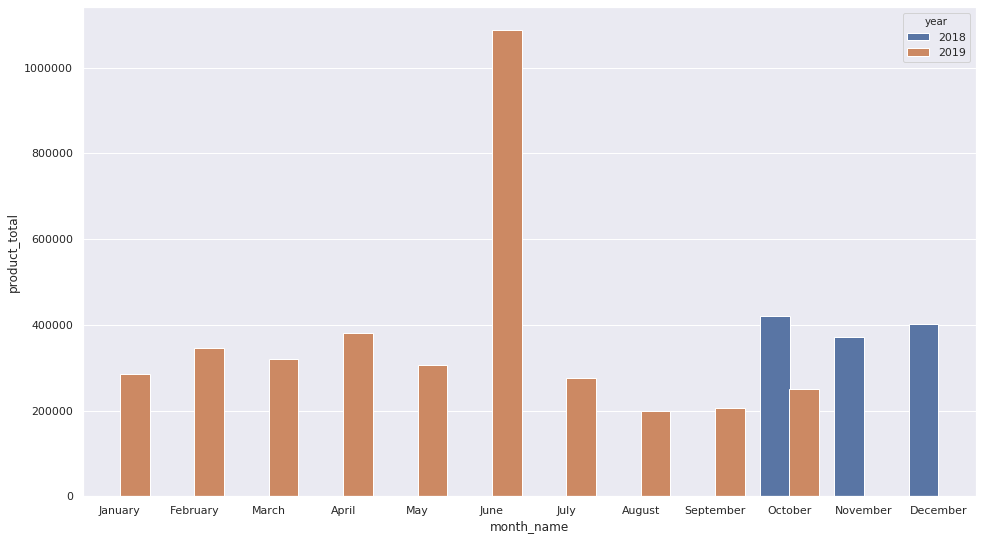

In [32]:
sns.barplot(x = 'month_name', y = 'product_total', hue = 'year', order =  month_order, data = temp)
plt.show()

### Кривой сдвиг по месяцам и годам. Если не группировать по году, то октябрь посчитается два раза. И порядок месяцев сбивается. [/1/](#stage_8)

Я про привычный порядок: январь/декабрь, это имел в виду, ссылка как раз ordering данных. =)

---

<div class="alert alert-block alert-warning">
    

### Комментарий от тимлида

Не совсем поняла про кривой сдвиг -- кажется что это просто данных больше чем за 12 месяцев))
</div>

---

---

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида v2

Ясно))
</div>

---

### Имеем июль в перекосе, просадку в октябре по аналогичному показателю прошлого года. Пока вроде все.

In [33]:
df[['product']].sample(5) # Понажимаем несколько раз, чтобы понять что можно сделать со столбцом.

,product
5394,рассада кабачка сорт зебра кассета 6 шт e6
6427,пеларгония зональная диам. 12 см коралловая по...
5478,рассада огурца сорт каролина кассета 6 шт e6
5644,роза садовая спрей в горшке лидия вайт
1581,фикус каучуконосный эластика абиджан d-12 см h...


In [34]:
# Кажется, что можно взять первые два слова и будет окей.
# Попробуем сначала по-тупому.

In [35]:
unique_products = df['product'].unique().tolist()

In [36]:
m = Mystem()
string = '; '.join(unique_products)

In [37]:
lemmas = m.lemmatize(string)
pprint.pprint(Counter(lemmas))

Counter({' ': 15372,
         '; ': 2336,
         ', ': 1066,
         'см': 1061,
         '-': 976,
         'для': 547,
         ',': 295,
         'в': 274,
         'd': 260,
         'с': 254,
         'л': 253,
         'рассада': 221,
         '5': 190,
         ' (': 173,
         'белый': 172,
         'сорт': 171,
         'кассета': 170,
         'шт': 169,
         '0': 164,
         '12': 147,
         'белье': 144,
         'красный': 144,
         ') ': 140,
         '/': 133,
         'доска': 132,
         'горшок': 130,
         '9': 123,
         'сушилка': 120,
         'цветок': 118,
         'объем': 114,
         'гладильный': 113,
         '2': 113,
         '6': 110,
         'тележка': 108,
         '1': 108,
         'по': 101,
         '4': 101,
         'томат': 100,
         '10': 99,
         'сумка': 98,
         '. ': 98,
         'диам': 95,
         'помидор': 93,
         '*': 90,
         '№': 88,
         'пеларгония': 86,
         'розовый': 84,

In [38]:
df['word_count'] = df['product'].apply(lambda x: len(x.split()))

In [39]:
df.describe()

,year,week,month,hour,order_id,quantity,price,product_total,word_count
count,"6,737.00","6,737.00","6,737.00","6,737.00","6,737.00","6,737.00","6,737.00","6,737.00","6,737.00"
mean,"2,018.79",26.05,6.42,13.86,"43,128.95",2.50,462.03,720.09,7.99
std,0.41,13.19,3.04,4.97,"27,899.41",15.27,871.30,"8,352.10",2.32
min,"2,018.00",1.00,1.00,0.00,"12,624.00",1.00,9.00,9.00,3.00
25%,"2,019.00",17.00,4.00,10.00,"14,827.00",1.00,101.00,120.00,6.00
50%,"2,019.00",23.00,6.00,14.00,"68,503.00",1.00,135.00,162.00,8.00
75%,"2,019.00",40.00,9.00,18.00,"70,504.00",1.00,398.00,600.00,9.00
max,"2,019.00",52.00,12.00,23.00,"73,164.00","1,000.00","14,917.00","675,000.00",22.00


### Минимальная длина продукта 3 словоформы. Поглядим, что это за продукты. И другие, подлиннее тоже поглядим.

In [40]:
df[df['word_count'] == 3].sample(5)

,date,date_day,year,week,month_name,month,day_of_week,hour,customer_id,order_id,product,quantity,price,product_total,word_count
6463,2019-09-28 19:00:00,2019-09-28,2019,39,September,9,Saturday,19,ab292e24-9fdf-469a-8ea7-aad0112e4593,14938,пеларгония тюльпановидная emma,1,135.00,135.00,3
6621,2019-10-16 08:00:00,2019-10-16,2019,42,October,10,Wednesday,8,000d6849-084e-4d9f-ac03-37174eaf60c4,14943,пеларгония тюльпановидная emma,1,135.00,135.00,3
2584,2019-04-01 12:00:00,2019-04-01,2019,14,April,4,Monday,12,6177ca00-1b22-40d8-b4f1-87309c585546,70953,розмарин d-9 см,3,119.00,357.00,3
323,2018-10-19 14:00:00,2018-10-19,2018,42,October,10,Friday,14,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68692,сантолина d-9 см,1,112.00,112.00,3
6108,2019-08-15 23:00:00,2019-08-15,2019,33,August,8,Thursday,23,9988a59f-f1ec-4f0c-bb3e-cd0e235ad15e,14917,пеларгония тюльпановидная emma,4,135.00,540.00,3


In [41]:
df['product_2_first_words'] = df['product'].apply(lambda x: x.split()[:2])

In [42]:
df[['product_2_first_words']].sample(5)

,product_2_first_words
410,"[сумка-тележка, хозяйственная]"
682,"[пеларгония, зональная]"
436,"[щетка, для]"
5792,"[томата, (помидор)]"
1735,"[хлебница, деревянная]"


### Заменим символы: 
- (
- )
- ,
- ё

### replace выдает ошибку, так как в колонке список, а не строка. [/2/](#stage_8)

In [43]:
x = df.iloc[0,12]

In [44]:
type(x)

numpy.float64

In [45]:
x

142.0

In [46]:
df['product_2_first_words'] = df['product_2_first_words'].apply(lambda x: ' '.join(x))

In [47]:
df['product_2_first_words'] = df['product_2_first_words'].astype(str).str.replace('(', '', regex = True)
df['product_2_first_words'] = df['product_2_first_words'].astype(str).str.replace(')', '', regex = True)
df['product_2_first_words'] = df['product_2_first_words'].astype(str).str.replace(',', '', regex = True)
df['product_2_first_words'] = df['product_2_first_words'].astype(str).str.replace('ё', 'е', regex = True)

In [48]:
df['product_2_first_words'].sample(5)

2469      тарелка обеденная
4179      рассада патиссона
1026           нож кухонный
3014            сушилка для
3703    однолетнее растение
Name: product_2_first_words, dtype: object

In [49]:
unique_products = df['product_2_first_words'].unique().tolist()

In [50]:
string = '; '.join(unique_products)

In [51]:
lemmas = m.lemmatize(string)
pprint.pprint(Counter(lemmas))

Counter({' ': 907,
         '; ': 907,
         '-': 80,
         'для': 68,
         'd': 38,
         'рассада': 33,
         'муляж': 30,
         'скатерть': 23,
         'набор': 21,
         'петуния': 21,
         'вешалка': 20,
         'стремянка': 17,
         'с': 16,
         'в': 15,
         'коврик': 13,
         'алюминиевый': 12,
         'пеларгония': 11,
         'микс': 11,
         'махровый': 11,
         '12': 10,
         '9': 10,
         'сумка': 9,
         'тележка': 9,
         'щетка': 9,
         'салатник': 9,
         'дыня': 9,
         'пластмассовый': 8,
         'нож': 8,
         'роза': 8,
         'огурец': 8,
         'кухонный': 7,
         'ведро': 7,
         'насадка': 7,
         'ампельный': 7,
         'кружок': 7,
         'капуста': 7,
         'вербена': 7,
         'фуксия': 7,
         'сушилка': 6,
         'томат': 6,
         'ложка': 6,
         'кружка': 6,
         'хозяйственный': 6,
         '13': 6,
         'цикламен': 6,
 

In [52]:
len(lemmas)

3794

In [53]:
df['product_first_word'] = df['product'].apply(lambda x: x.split()[:1]).apply(lambda x: ' '.join(x))

In [54]:
df.head()

,date,date_day,year,week,month_name,month,day_of_week,hour,customer_id,order_id,product,quantity,price,product_total,word_count,product_2_first_words,product_first_word
0,2018-10-01,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.00,142.00,8,комнатное растение,комнатное
1,2018-10-01,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.00,194.00,8,комнатное растение,комнатное
2,2018-10-01,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.00,112.00,5,радермахера d-12,радермахера
3,2018-10-01,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.00,179.00,4,хризолидокарпус лутесценс,хризолидокарпус
4,2018-10-01,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.00,112.00,6,циперус зумула,циперус


In [55]:
category_list = df['product_first_word'].unique().tolist()
df['product_first_word'].unique()

array(['комнатное', 'радермахера', 'хризолидокарпус', 'циперус',
       'шеффлера', 'юкка', 'настенная', 'таз', 'чехол', 'вешалка',
       'сушилка', 'крючок', 'корзина', 'мини-сковорода', 'сковорода',
       'стеклянная', 'доска', 'сумка-тележка', 'многолетнее', 'рассада',
       'муляж', 'щетка-сметка', 'сумка', 'тарелка', 'вилка', 'ложка',
       'нож', 'герань', 'ерш', 'пеларгония', 'котел', 'суккулент',
       'эхеверия', 'набор', 'коврик', 'подкладка', 'дозатор', 'ёрш',
       'эвкалипт', 'цветок', 'мусорный', 'плед', 'скатерть', 'кувшин',
       'адиантум', 'ковер', 'перчатки', 'стремянка', 'гладильная',
       'лестница-стремянка', 'толкушка', 'тележка', 'готовая',
       'искусственный', 'простыня', 'чайник', 'штора', 'банка', 'стяжка',
       'комплект', 'кампанула', 'декоративная', 'противень', 'калатея',
       'нолина', 'плечики', 'подушка', 'полотенце', 'хлорофитум',
       'цикламен', 'крепеж', 'пружина', 'глоксиния', 'азалия',
       'гортензия', 'хризантема', 'петля', 

In [56]:
category_list

['комнатное',
 'радермахера',
 'хризолидокарпус',
 'циперус',
 'шеффлера',
 'юкка',
 'настенная',
 'таз',
 'чехол',
 'вешалка',
 'сушилка',
 'крючок',
 'корзина',
 'мини-сковорода',
 'сковорода',
 'стеклянная',
 'доска',
 'сумка-тележка',
 'многолетнее',
 'рассада',
 'муляж',
 'щетка-сметка',
 'сумка',
 'тарелка',
 'вилка',
 'ложка',
 'нож',
 'герань',
 'ерш',
 'пеларгония',
 'котел',
 'суккулент',
 'эхеверия',
 'набор',
 'коврик',
 'подкладка',
 'дозатор',
 'ёрш',
 'эвкалипт',
 'цветок',
 'мусорный',
 'плед',
 'скатерть',
 'кувшин',
 'адиантум',
 'ковер',
 'перчатки',
 'стремянка',
 'гладильная',
 'лестница-стремянка',
 'толкушка',
 'тележка',
 'готовая',
 'искусственный',
 'простыня',
 'чайник',
 'штора',
 'банка',
 'стяжка',
 'комплект',
 'кампанула',
 'декоративная',
 'противень',
 'калатея',
 'нолина',
 'плечики',
 'подушка',
 'полотенце',
 'хлорофитум',
 'цикламен',
 'крепеж',
 'пружина',
 'глоксиния',
 'азалия',
 'гортензия',
 'хризантема',
 'петля',
 'салфетка',
 'вкладыши',
 '

### [/3/](#stage_8) Словари со списками внутри

In [57]:
from collections import defaultdict
category_dict = defaultdict(list)

In [58]:
# df.to_excel('data.xlsx', index=False)

In [59]:
# for item in range(len(category_list)):
#     print(category_list[item])
#     category = input()
#     if category == 'exit':
#         break
#     else:
#         category_dict[category].append(category_list[item])
#         print()
#         print('---------')

In [60]:
# dict(category_dict)

In [61]:
category_dict = {'растение': ['комнатное',
  'радермахера',
  'хризолидокарпус',
  'циперус',
  'мединилла',
  'шеффлера',
  'юкка',
  'многолетнее',
  'рассада',
  'герань',
  'пеларгония',
  'суккулент',
  'эхеверия',
  'эвкалипт',
  'цветок',
  'адиантум',
  'кампанула',
  'калатея',
  'нолина',
  'хлорофитум',
  'цикламен',
  'глоксиния',
  'азалия',
  'гортензия',
  'хризантема',
  'мирт',
  'цветущее',
  'кориандр',
  'иссоп',
  'сантолина',
  'аспарагус',
  'афеляндра',
  'антуриум',
  'молодило',
  'фиалка',
  'гербера',
  'душица',
  'мелисса',
  'роза',
  'бегония',
  'розмарин',
  'альбука',
  'бальзамин',
  'крассула',
  'артемизия',
  'лаванда',
  'мята',
  'каланхое',
  'примула',
  'дендробиум',
  'калоцефалус',
  'каллуна',
  'капсикум',
  'мимоза',
  'соланум',
  'бархатцы',
  'космея',
  'морковь',
  'настурция',
  'огурец',
  'петуния',
  'алиссум',
  'гвоздика',
  'годеция',
  'календула',
  'капуста',
  'кореопсис',
  'лапчатка',
  'львиный',
  'флокс',
  'цинерария',
  'эшшольция',
  'диффенбахия',
  'фаленопсис',
  'подсолнечник',
  'пуансетия',
  'гиностемма',
  'ель',
  'кипарисовик',
  'аптения',
  'новогоднее',
  'пуансеттия',
  'скиммия',
  'фиттония',
  'тимьян',
  'алоэ',
  'спатифиллум',
  'фикус',
  'кодонанта',
  'цикламен,',
  'гимнокалициум',
  'кофе',
  'эхинокактус',
  'фал',
  'крокусы',
  'гипсофила',
  'калибрахоа',
  'эпипремнум',
  'аквилегия',
  'базилик',
  'горох',
  'земляника',
  'незабудка',
  'седум',
  'томат',
  'укроп',
  'нефролепис',
  'калла',
  'декабрист',
  'тюльпан',
  'гиацинт',
  'вербена',
  'однолетнее',
  'чабер',
  'бакопа',
  'ранункулус',
  'газания',
  'овсянница',
  'георгина',
  'смолевка',
  'цинния',
  'лавр',
  'вербейник',
  'виола',
  'колокольчик',
  'котовник',
  'эхинацея',
  'ясколка',
  'лилейник',
  'папоротник',
  'платикодон',
  'энотера',
  'фуксия',
  'цитрофортунелла',
  'пеперомия',
  'дыня',
  'циния',
  'синнингия',
  'гардения',
  'томата',
  'лобелия',
  'табак',
  'девичий',
  'мускари',
  'пиретрум',
  'агератум',
  'колеус',
  'тагетис',
  'цинерания',
  'муррайя',
  'портулак',
  'астра',
  'аргирантерум',
  'левкой',
  'вероника',
  'целозия',
  'арбуз',
  'баклажан',
  'клубника',
  'патиссон',
  'маттиола',
  'сальвия',
  'лук',
  'джункус',
  'драцена',
  'фатсия',
  'хоста',
  'гайлардия',
  'монарда',
  'нивянник',
  'рудбекия',
  'барвинок',
  'осина',
  'сциндапсус',
  'пряные',
  'бузульник',
  'камнеломка',
  'солидаго',
  'физостегия',
  'бадан',
  'лен',
  'лантана',
  'лаватера',
  'анемона',
  'буддлея',
  'валериана',
  'змееголовник',
  'любисток',
  'петрушка',
  'сельдерей',
  'шалфей',
  'вигна',
  'кабачок',
  'тыква',
  'хамедорея',
  'зверобой',
  'импатиенс',
  'клен',
  'замиокулькас',
  'амариллис',
  'салат',
  'пахира',
  'литопс'],
 'хозтовары': ['настенная',
  'антинакипин',
  'таз',
  'чехол',
  'вешалка',
  'сушилка',
  'крючок',
  'корзина',
  'доска',
  'щетка-сметка',
  'ерш',
  'набор',
  'подкладка',
  'ёрш',
  'мусорный',
  'перчатки',
  'стремянка',
  'гладильная',
  'лестница-стремянка',
  'стяжка',
  'комплект',
  'плечики',
  'крепеж',
  'пружина',
  'петля',
  'стиральный',
  'чистящий',
  'щетка',
  'стремянки',
  'щетка-утюжок',
  'жидкое',
  'пена',
  'подрукавник',
  'сверло-фреза,',
  'зубная',
  'веник',
  'швабра',
  'насадка',
  'ножеточка',
  'вешалка-плечики',
  'настольная',
  'холодная',
  'шнур',
  'урна',
  'мыло',
  'сметка',
  'измерительный',
  'линейка,',
  'средство',
  'бензин',
  'паста',
  'петля-стрела',
  'вешалка-стойка',
  'держатель',
  'пробка',
  'вешалки',
  'губка',
  'антижир',
  'универсальное',
  'ролик',
  'сменный',
  'термометр',
  'шило',
  'кухонные',
  'ароматизированное',
  'бальзам',
  'рассекатель',
  'ополаскиватель',
  'сетка',
  'вешалка-сушилка',
  'ручка-скоба',
  'мыльница',
  'многофункциональный',
  'стремянка-табурет',
  'кольца',
  'вантуз',
  'кондиционер',
  'защитная',
  'гипоаллергенный',
  'вешалка-перекладина',
  'лестница',
  'совок',
  'насадка-отжим',
  'штанга',
  'увлажняющая',
  'штангенциркуль',
  'мыло-скраб',
  'рукав',
  'бак',
  'концентрат',
  'окномойка',
  'сменная',
  'насадка-моп',
  'подвесное',
  'автоматическая',
  'тряпкодержатель',
  'бельевые',
  'сверло',
  'фиксатор-шар',
  'отжим',
  'шпагат',
  'ванна',
  'прищепки',
  'покрытие',
  'веревка',
  'мешок',
  'отбеливатель',
  'ручка',
  'пьезозажигалка',
  'решетка',
  'запасная',
  'щётка',
  'уголок',
  'вакуумный',
  'тряпка',
  'основание',
  'стяжки',
  'шпингалет'],
 'посуда': ['мини-сковорода',
  'сковорода',
  'стеклянная',
  'тарелка',
  'вилка',
  'ложка',
  'нож',
  'котел',
  'дозатор',
  'кувшин',
  'толкушка',
  'банка',
  'противень',
  'вкладыши',
  'tepмокружка',
  'контейнер',
  'ведро',
  'масленка',
  'корыто',
  'салатник',
  'чайный',
  'рыбочистка',
  'терка',
  'кружка',
  'лопатка',
  'салфетница',
  'стакан',
  'столовая',
  'чайная',
  'овощечистка',
  'лоток',
  'ковш',
  'кисточка',
  'скребок',
  'картофелемялка',
  'жестяная',
  'миска',
  'пресс',
  'термостакан',
  'защитный',
  'термокружка',
  'термос',
  'фарфоровая',
  'столовый',
  'блюдце',
  'бульонница',
  'разделочная',
  'емкость',
  'модульная',
  'просеиватель',
  'кастрюля',
  'хлебница',
  'форма',
  'орехоколка',
  'скалка',
  'венчик',
  'сито',
  'тортница',
  'блюдо',
  'сотейник',
  'бидон',
  'ваза',
  'отделитель',
  'шприц',
  'крышка',
  'сахарница',
  'универсальный',
  'половник',
  'мерный'],
 'сумки': ['сумка-тележка',
  'сумка',
  'тележка',
  'кофр',
  'ящик',
  'короб',
  'коробка',
  'складная',
  'корзинка'],
 'интерьер': ['муляж',
  'коврик',
  'плед',
  'скатерть',
  'ковер',
  'готовая',
  'искусственный',
  'простыня',
  'штора',
  'декоративная',
  'подушка',
  'полотенце',
  'салфетка',
  'ковёр',
  'карниз',
  'подголовник',
  'наматрасник',
  'наматрицник-чехол',
  'сиденье',
  'сервировочная',
  'халат',
  'комод',
  'покрывало',
  'подставка',
  'одеяло',
  'фоторамка',
  'этажерка',
  'простынь',
  'полки',
  'ключница',
  'махровое',
  'искусственная',
  'нетканые',
  'кухонное',
  'подарочный',
  'махровый',
  'полка',
  'урна-пепельница',
  'ткань',
  'наматрацник',
  'наволочка',
  'обувница-3',
  'пододеяльник',
  'стеллаж',
  'складной',
  'завертка',
  'двуспальное'],
 'техника': ['чайник',
  'миксер',
  'светильник',
  'утюг',
  'овощеварка',
  'измельчитель',
  'фен',
  'мантоварка',
  'весы',
  'электроштопор',
  'мантоварка-пароварка',
  'пылесос',
  'соковарка',
  'соковыжималка',
  'кипятильник']}

### Проверяю категории на сайтах интернет-магазинов руками, непонятно о чем речь иногда.

In [62]:
def category_func(name):
    for key, value in category_dict.items():
        for word in value:
            if name.find(word) > -1:
                return key
    return 'Нет категории'

In [63]:
df['category'] = df['product'].apply(category_func)

In [64]:
df['category'].value_counts(ascending = False)

растение     4615
хозтовары     875
интерьер      486
сумки         443
посуда        278
техника        40
Name: category, dtype: int64

### [/4/](#stage_8) Изучаю вордклауды

In [65]:
text_for_wordcloud = df['product_first_word'].unique().tolist()

In [66]:
text_for_wordcloud = ' '.join(text_for_wordcloud)

In [67]:
wc = WordCloud(background_color="white", max_words=2000)

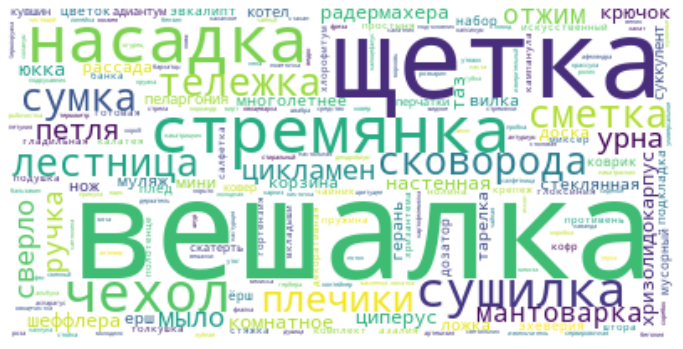

In [68]:
plt.figure(figsize = (12, 10), facecolor = None) 
wc.generate(text_for_wordcloud)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

---

<div class="alert alert-block alert-warning">
    

### Комментарий от тимлида v2

Было бы не плохо прокомментировать это облако, а не просто вывести его)
</div>

---

### Топ/Дно 5 клиентов 

In [69]:
# Уберем ванзузы
df_without_plungers = df.query('product_total != 675000')

In [70]:
df_without_plungers.loc[:,['customer_id', 'product_total']].groupby('customer_id').sum().sort_values('product_total', ascending=False).head()

,product_total
customer_id,
c971fb21-d54c-4134-938f-16b62ee86d3b,"166,988.00"
1d6c8c1f-a799-4418-9af2-1ded47d7a85c,"114,750.00"
57cc80a2-2610-4eef-9457-e7c3bf0c72f0,"65,220.00"
4d93d3f6-8b24-403b-a74b-f5173e40d7db,"60,828.00"
58a4c3cc-504f-43ea-a74a-bae19e665552,"53,232.00"


In [71]:
df_without_plungers.loc[:,['customer_id', 'product_total']].groupby('customer_id').sum().sort_values('product_total', ascending=False).tail()

,product_total
customer_id,
e9e94e71-4cd2-47fc-9b3f-1ec96bd2d95e,22.00
10f79846-2640-4c43-8392-4e76ff5455ef,22.00
f32b5708-af61-42e7-baba-9f3759d87841,15.00
2330d859-e9cb-4c8f-abd0-55f9e27e6745,15.00
cab090a5-b8dd-442d-a206-0ef3bf5fc1d8,14.00


### Разброс приличный. Возможно, есть киты/оптовики.

In [72]:
pivot = df_without_plungers.pivot_table(index = 'product', 
                                        aggfunc ={'customer_id':'nunique', 'quantity':'sum', 'product_total':'sum'})

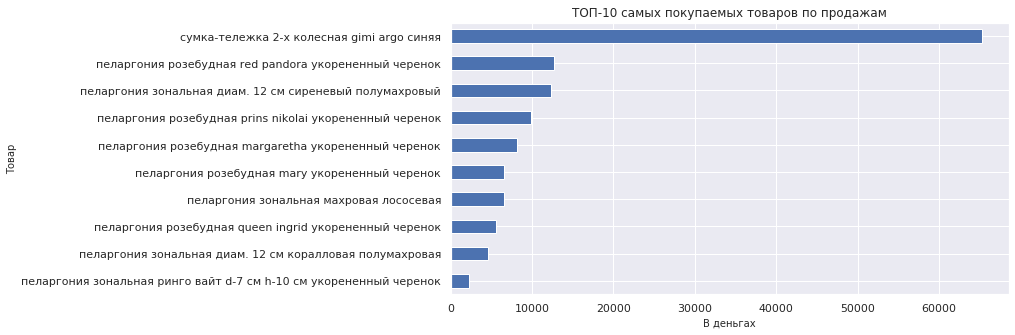

In [73]:
pivot.rename(columns={'customer_id':'unique_users'}, inplace=True)
pivot = pivot.sort_values(by= 'unique_users', ascending = False).head(10)
pivot['product_total'].sort_values(ascending= True).plot(kind="barh", figsize = (10,5), title = "ТОП-10 самых покупаемых товаров по продажам")
plt.xlabel('В деньгах', fontsize=10) 
plt.ylabel('Товар', fontsize=10) 
plt.show()

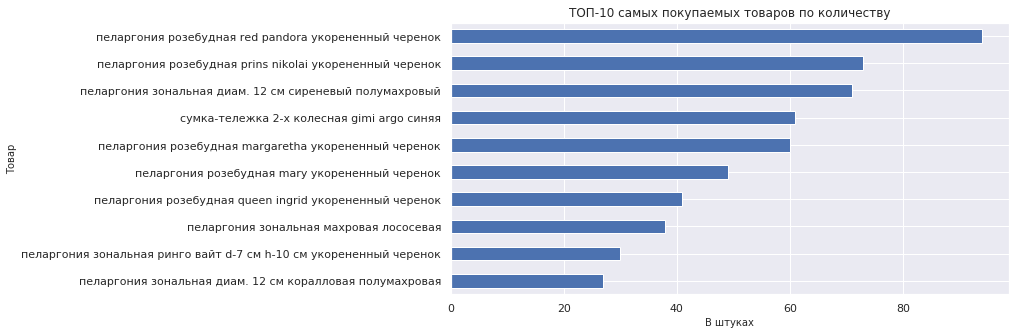

In [74]:
pivot['quantity'].sort_values(ascending= True).plot(kind="barh", figsize = (10,5), title = "ТОП-10 самых покупаемых товаров по количеству")
plt.xlabel('В штуках', fontsize=10) 
plt.ylabel('Товар', fontsize=10)
plt.show()

In [75]:
def season(month):
    if  3 <= month <= 5:
        return 'весна'
    elif 6 <= month <= 8:
        return 'лето'
    elif 9 <= month <= 11:
        return 'осень'
    else:
        return "зима" 

In [76]:
df_without_plungers['season'] = df_without_plungers['month'].apply(season)

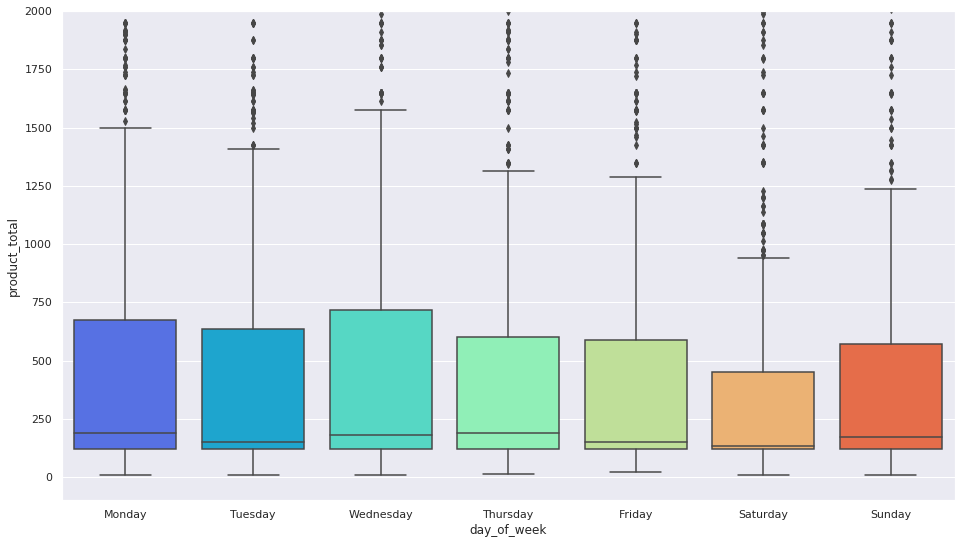

In [77]:
ax = sns.boxplot(x="day_of_week", y="product_total", data=df_without_plungers, palette='rainbow')
ax.set_ylim(-100, 2000)
plt.show()

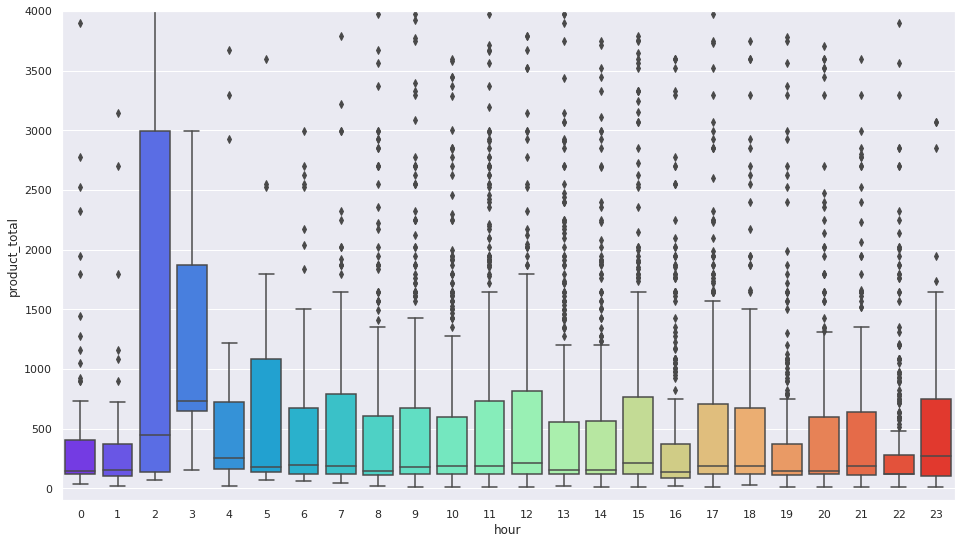

In [78]:
ax = sns.boxplot(x="hour", y="product_total", data=df_without_plungers, palette='rainbow')
ax.set_ylim(-100, 4000)
plt.show()

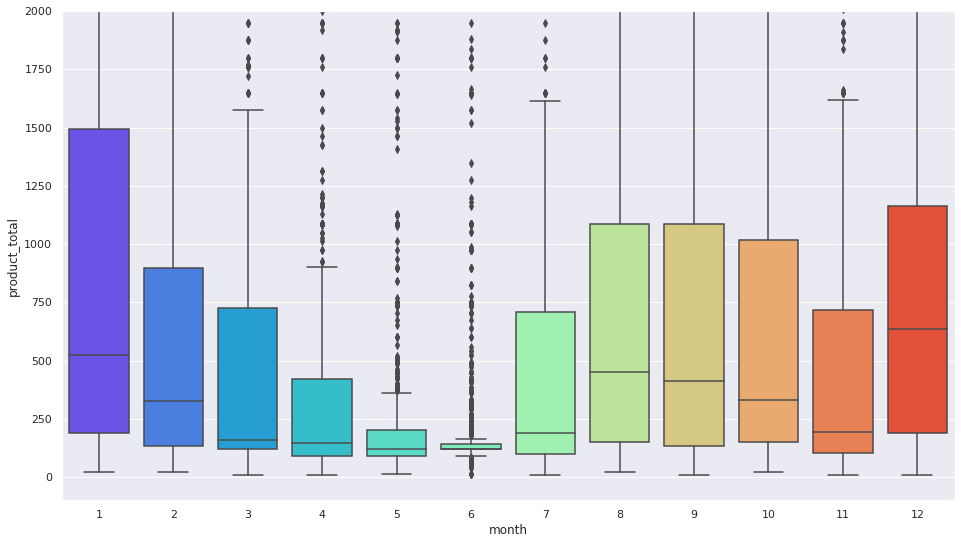

In [79]:
ax = sns.boxplot(x='month', y="product_total", data=df_without_plungers, palette='rainbow')
ax.set_ylim(-100, 2000)
plt.show()

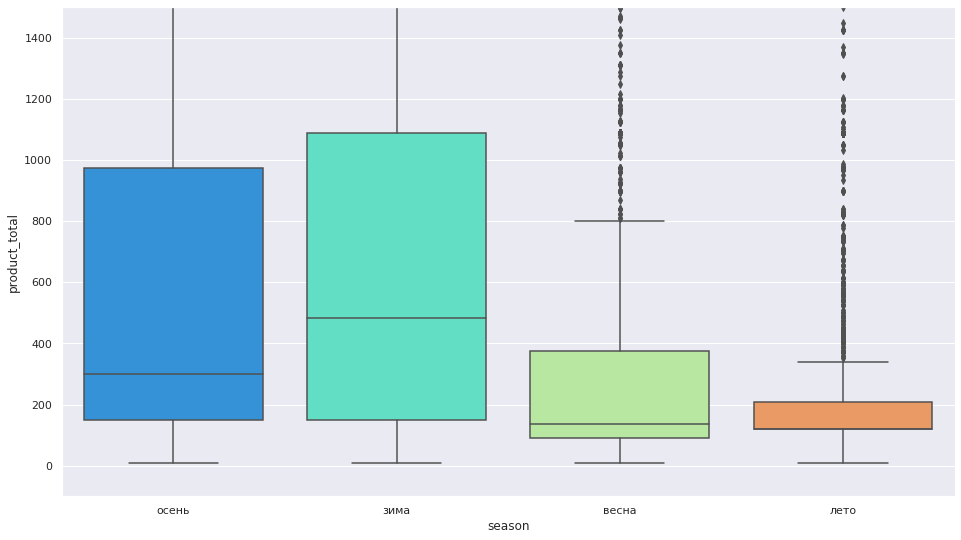

In [80]:
ax = sns.boxplot(x='season', y="product_total", data=df_without_plungers, palette='rainbow')
ax.set_ylim(-100, 1500)
plt.show()

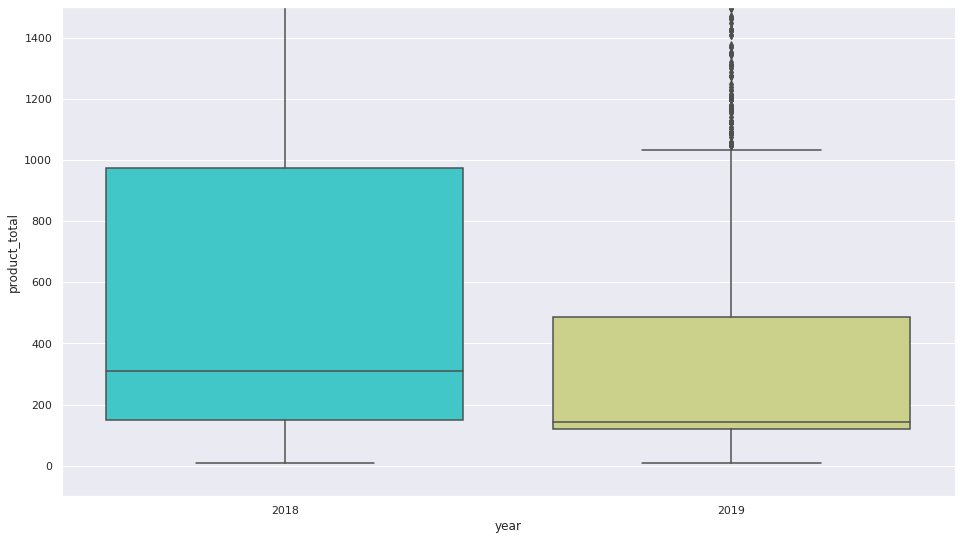

In [81]:
ax = sns.boxplot(x='year', y="product_total", data=df_without_plungers, palette='rainbow')
ax.set_ylim(-100, 1500)
plt.show()

In [82]:
temp = df_without_plungers.groupby(['category']).agg({'product_total': 'sum'})
temp.reset_index(inplace = True)

In [83]:
temp

,category,product_total
0,интерьер,"555,020.00"
1,посуда,"210,464.00"
2,растение,"1,391,542.00"
3,сумки,"869,720.00"
4,техника,"38,808.00"
5,хозтовары,"1,110,726.00"


In [84]:
df_without_plungers.head()

,date,date_day,year,week,month_name,month,day_of_week,hour,customer_id,order_id,product,quantity,price,product_total,word_count,product_2_first_words,product_first_word,category,season
0,2018-10-01,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.00,142.00,8,комнатное растение,комнатное,растение,осень
1,2018-10-01,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.00,194.00,8,комнатное растение,комнатное,растение,осень
2,2018-10-01,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.00,112.00,5,радермахера d-12,радермахера,растение,осень
3,2018-10-01,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.00,179.00,4,хризолидокарпус лутесценс,хризолидокарпус,растение,осень
4,2018-10-01,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.00,112.00,6,циперус зумула,циперус,растение,осень


In [85]:
df_without_plungers['category'].unique()

array(['растение', 'хозтовары', 'посуда', 'сумки', 'интерьер', 'техника'],
      dtype=object)

In [86]:
flowers = df_without_plungers.query('category == "растение"')
household_goods = df_without_plungers.query('category == "хозтовары"')
tableware = df_without_plungers.query('category == "посуда"')
bags = df_without_plungers.query('category == "сумки"')
interior_goods = df_without_plungers.query('category == "интерьер"')
equipment = df_without_plungers.query('category == "техника"')

In [87]:
flowers.head()

,date,date_day,year,week,month_name,month,day_of_week,hour,customer_id,order_id,product,quantity,price,product_total,word_count,product_2_first_words,product_first_word,category,season
0,2018-10-01,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.00,142.00,8,комнатное растение,комнатное,растение,осень
1,2018-10-01,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.00,194.00,8,комнатное растение,комнатное,растение,осень
2,2018-10-01,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.00,112.00,5,радермахера d-12,радермахера,растение,осень
3,2018-10-01,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.00,179.00,4,хризолидокарпус лутесценс,хризолидокарпус,растение,осень
4,2018-10-01,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.00,112.00,6,циперус зумула,циперус,растение,осень


# Посмотрим по сезону, дням и времени

# Категория: Растения

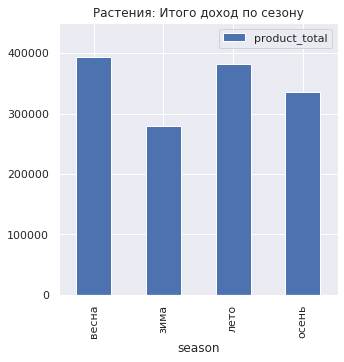

In [88]:
ax = flowers.groupby(['season']).agg({'product_total': 'sum'}).plot(kind='bar', title = 'Растения: Итого доход по сезону', figsize = (5,5))
ax.set_ylim(-100, 450000)
plt.show()

Растения растут весной и летом, спад виден зимой и осенью, тем более в осени 2 октября за 18 и 19 год.

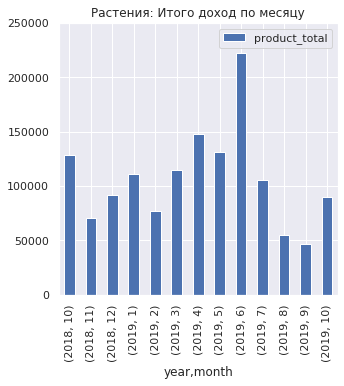

In [89]:
ax = flowers.groupby(['year', 'month']).agg({'product_total': 'sum'}).plot(kind='bar', title = 'Растения: Итого доход по месяцу', figsize = (5,5))
ax.set_ylim(-100, 250000)
plt.show()

Видна негативная тенденция в 19 году, а вот весна и лето за выглядят хорошо.

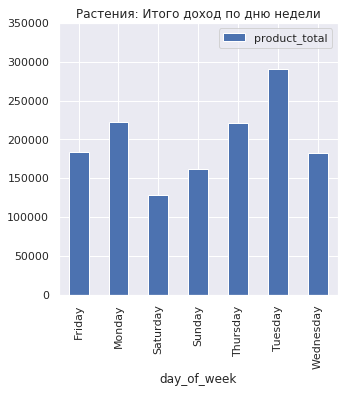

In [90]:
ax = flowers.groupby(['day_of_week']).agg({'product_total': 'sum'}).plot(kind='bar', title = 'Растения: Итого доход по дню недели', figsize = (5,5))
ax.set_ylim(-100, 350000)
plt.show()

Во вторник покупают много растений, было бы неплохо понять, что на это повлияло, были ли дополнительные рекламные источники в этот день или это поведенческая особенность.

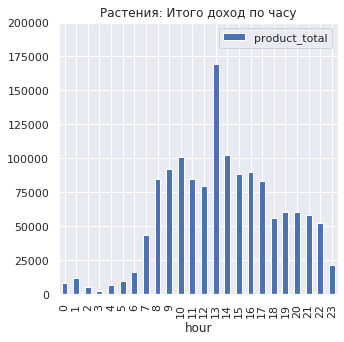

In [91]:
ax = flowers.groupby(['hour']).agg({'product_total': 'sum'}).plot(kind='bar', title = 'Растения: Итого доход по часу', figsize = (5,5))
ax.set_ylim(-100, 200000)
plt.show()

с 23 часов и до 6 покупают плохо. Хорошо покупают в обед, несколько хуже, но стабильно вечером. Возможно, стоит отключить платный трафик в ночное время.

# Категория: Хозтовары

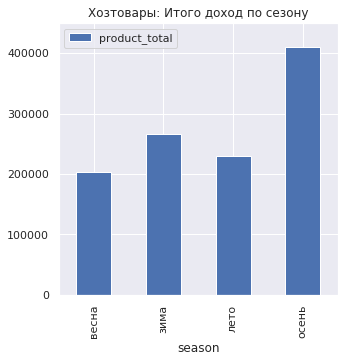

In [92]:
ax = household_goods.groupby(['season']).agg({'product_total': 'sum'}).plot(kind='bar', title = 'Хозтовары: Итого доход по сезону', figsize = (5,5))
ax.set_ylim(-100, 450000)
plt.show()

Запасаются хозтоварами осенью и зимой.

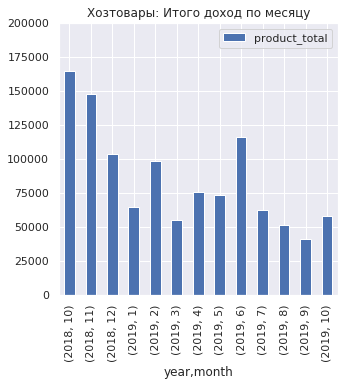

In [93]:
ax = household_goods.groupby(['year', 'month']).agg({'product_total': 'sum'}).plot(kind='bar', title = 'Хозтовары: Итого доход по месяцу', figsize = (5,5))
ax.set_ylim(-100, 200000)
plt.show()

Хозтовары падают, если в 2018 году все было неплохо, то теперь заметно сильное падение.

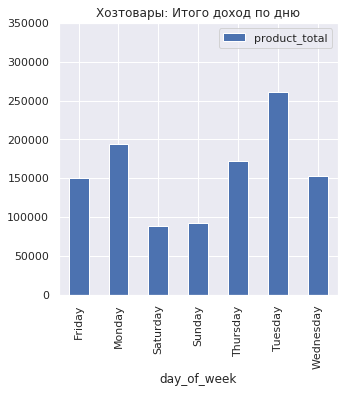

In [94]:
ax = household_goods.groupby(['day_of_week']).agg({'product_total': 'sum'}).plot(kind='bar', title = 'Хозтовары: Итого доход по дню', figsize = (5,5))
ax.set_ylim(-100, 350000)
plt.show()

В выходные просадка, снова во вторник подъем.

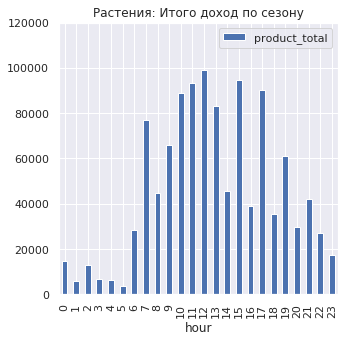

In [95]:
ax = household_goods.groupby(['hour']).agg({'product_total': 'sum'}).plot(kind='bar', title = 'Растения: Итого доход по сезону', figsize = (5,5))
ax.set_ylim(-100, 120000)
plt.show()

Видны странные всплески в 15, 17, 19, 21 час. С нуля до 5 утра продаж почти нет.

# Категория: Посуда

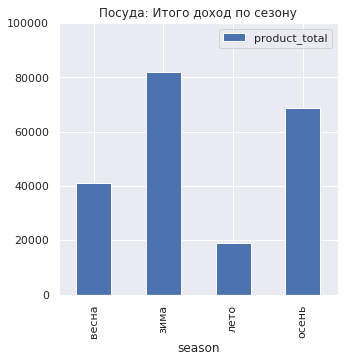

In [96]:
ax = tableware.groupby(['season']).agg({'product_total': 'sum'}).plot(kind='bar', title = 'Посуда: Итого доход по сезону', figsize = (5,5))
ax.set_ylim(-100, 100000)
plt.show()

У посуды зимой и осенью все в порядке, летом просадка.

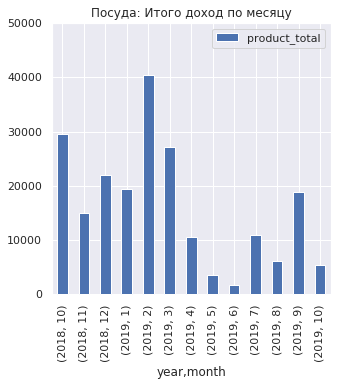

In [97]:
ax = tableware.groupby(['year', 'month']).agg({'product_total': 'sum'}).plot(kind='bar', title = 'Посуда: Итого доход по месяцу', figsize = (5,5))
ax.set_ylim(-100, 50000)
plt.show()

У посуды что-то пошло не так в 5 месяце и 6 месяце 19 года, на прежний уровень продаж категория не взлетела.

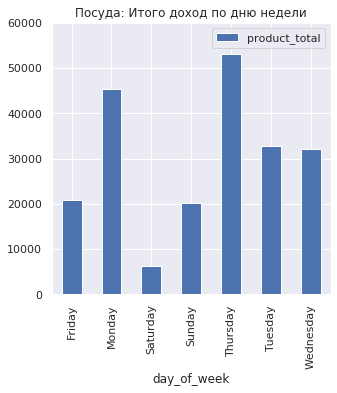

In [98]:
ax = tableware.groupby(['day_of_week']).agg({'product_total': 'sum'}).plot(kind='bar', title = 'Посуда: Итого доход по дню недели', figsize = (5,5))
ax.set_ylim(-100, 60000)
plt.show()

В понедельник и четверг особенно посуда чувствует себя хорошо.

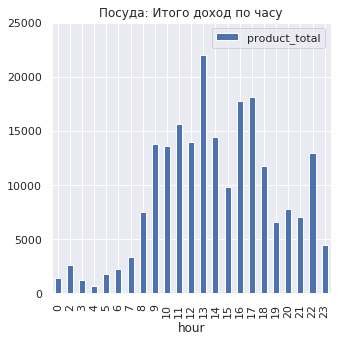

In [99]:
ax = tableware.groupby(['hour']).agg({'product_total': 'sum'}).plot(kind='bar', title = 'Посуда: Итого доход по часу', figsize = (5,5))
ax.set_ylim(-100, 25000)
plt.show()

С нуля и до 7 утра посуда продается плохо.

# Категория: Сумки

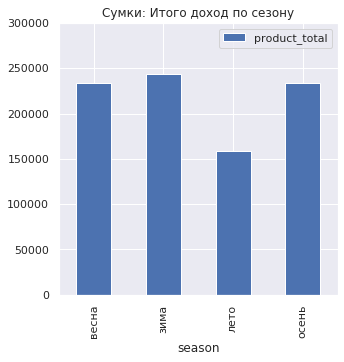

In [100]:
ax = bags.groupby(['season']).agg({'product_total': 'sum'}).plot(kind='bar', title = 'Сумки: Итого доход по сезону', figsize = (5,5))
ax.set_ylim(-100, 300000)
plt.show()

Просадка летом, а вот в остальные сезоны спрос стабилен.

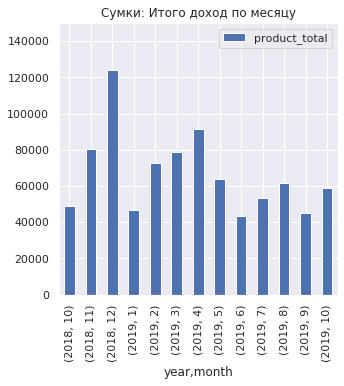

In [101]:
ax = bags.groupby(['year', 'month']).agg({'product_total': 'sum'}).plot(kind='bar', title = 'Сумки: Итого доход по месяцу', figsize = (5,5))
ax.set_ylim(-100, 150000)
plt.show()

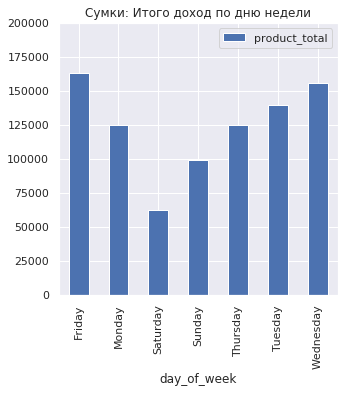

In [102]:
ax = bags.groupby(['day_of_week']).agg({'product_total': 'sum'}).plot(kind='bar', title = 'Сумки: Итого доход по дню недели', figsize = (5,5))
ax.set_ylim(-100, 200000)
plt.show()

Занятная картина, в субботу спрос минимален и растет до пятницы.

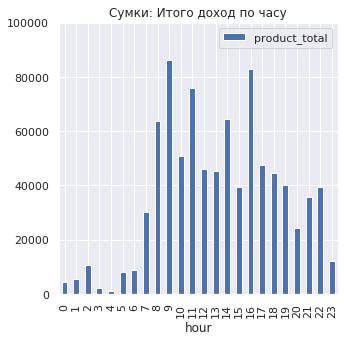

In [103]:
ax = bags.groupby(['hour']).agg({'product_total': 'sum'}).plot(kind='bar', title = 'Сумки: Итого доход по часу', figsize = (5,5))
ax.set_ylim(-100, 100000)
plt.show()

Опять наблюдаем устойчивую картину — с 0 до 6 утра покупают мало.

# Категория: Интерьер

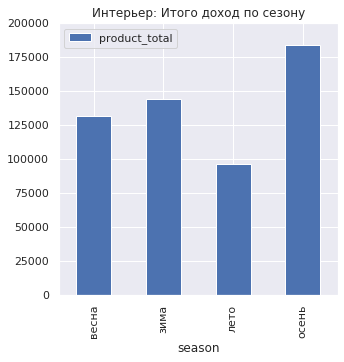

In [104]:
ax = interior_goods.groupby(['season']).agg({'product_total': 'sum'}).plot(kind='bar', title = 'Интерьер: Итого доход по сезону', figsize = (5,5))
ax.set_ylim(-100, 200000)
plt.show()

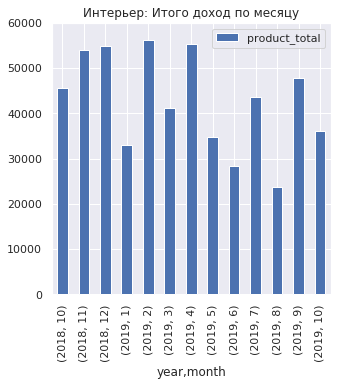

In [105]:
ax = interior_goods.groupby(['year', 'month']).agg({'product_total': 'sum'}).plot(kind='bar', title = 'Интерьер: Итого доход по месяцу', figsize = (5,5))
ax.set_ylim(-100, 60000)
plt.show()

Спрос на категорию выглядит неустойчиво.

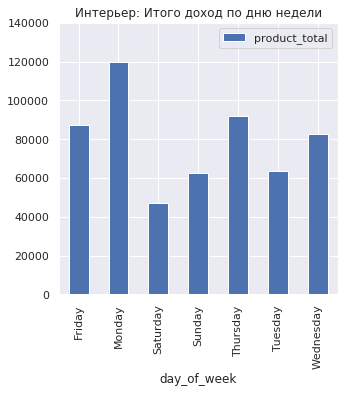

In [106]:
ax = interior_goods.groupby(['day_of_week']).agg({'product_total': 'sum'}).plot(kind='bar', title = 'Интерьер: Итого доход по дню недели', figsize = (5,5))
ax.set_ylim(-100, 140000)
plt.show()

В выходные предметы интерьера покупают хуже, лучше всего в понедельник.

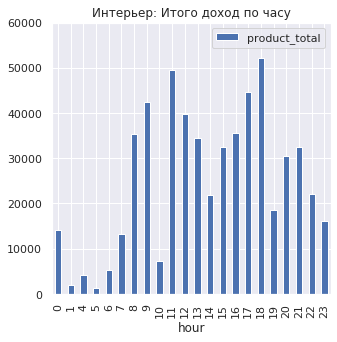

In [107]:
ax = interior_goods.groupby(['hour']).agg({'product_total': 'sum'}).plot(kind='bar', title = 'Интерьер: Итого доход по часу', figsize = (5,5))
ax.set_ylim(-100, 60000)
plt.show()

Виден странный провал в 10 часов, но он может быть вызван пичком в 9 часов. В некоторые утра часы покупок нет вообще.

# Категория: Техника

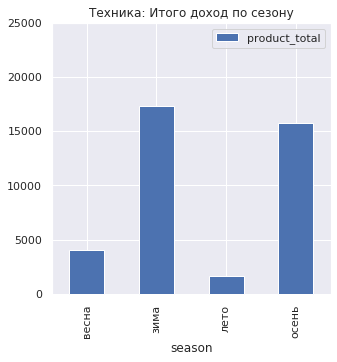

In [108]:
ax = equipment.groupby(['season']).agg({'product_total': 'sum'}).plot(kind='bar', title = 'Техника: Итого доход по сезону', figsize = (5,5))
ax.set_ylim(-100, 25000)
plt.show()

Технику хорошо берут осенью и зимой.

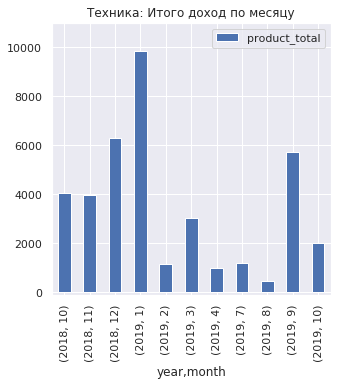

In [109]:
ax = equipment.groupby(['year', 'month']).agg({'product_total': 'sum'}).plot(kind='bar', title = 'Техника: Итого доход по месяцу', figsize = (5,5))
ax.set_ylim(-100, 11000)
plt.show()

Не смотря на пик в 9 месяце 2019 года, в целом продажи категории выглядят провально по сравнению продажам в 18 году.

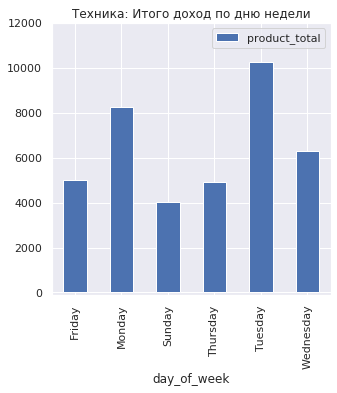

In [110]:
ax = equipment.groupby(['day_of_week']).agg({'product_total': 'sum'}).plot(kind='bar', title = 'Техника: Итого доход по дню недели', figsize = (5,5))
ax.set_ylim(-100, 12000)
plt.show()

Понедельник и вторник — вот когда техника лучше всего продается.

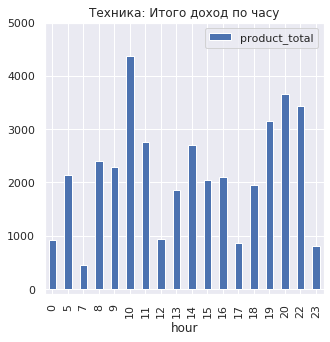

In [111]:
ax = equipment.groupby(['hour']).agg({'product_total': 'sum'}).plot(kind='bar', title = 'Техника: Итого доход по часу', figsize = (5,5))
ax.set_ylim(-100, 5000)
plt.show()

Также видно, что покупатели спят с 0 до 6 утра и не особо покупают что либо в это время.

---

<div class="alert alert-block alert-danger">
    

### Комментарий от тимлида

Мне кажется стоит поискать сезонности внутри дня (по часам), по дням недели (будни/выходны), по месяцам (вдруг есть сезонность летняя).
Также стоит посмотреть характерно ли это для некоторых категорий или для всех товаров вообще?    
</div>

---

---

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида v2

Увидела что это появилось -- спасибо! На мой взгляд там есть и правда интересные особенность по сезону для некоторых категорий)
</div>

---

### [/5/](#stage_8) Интересная статья про визуализацию

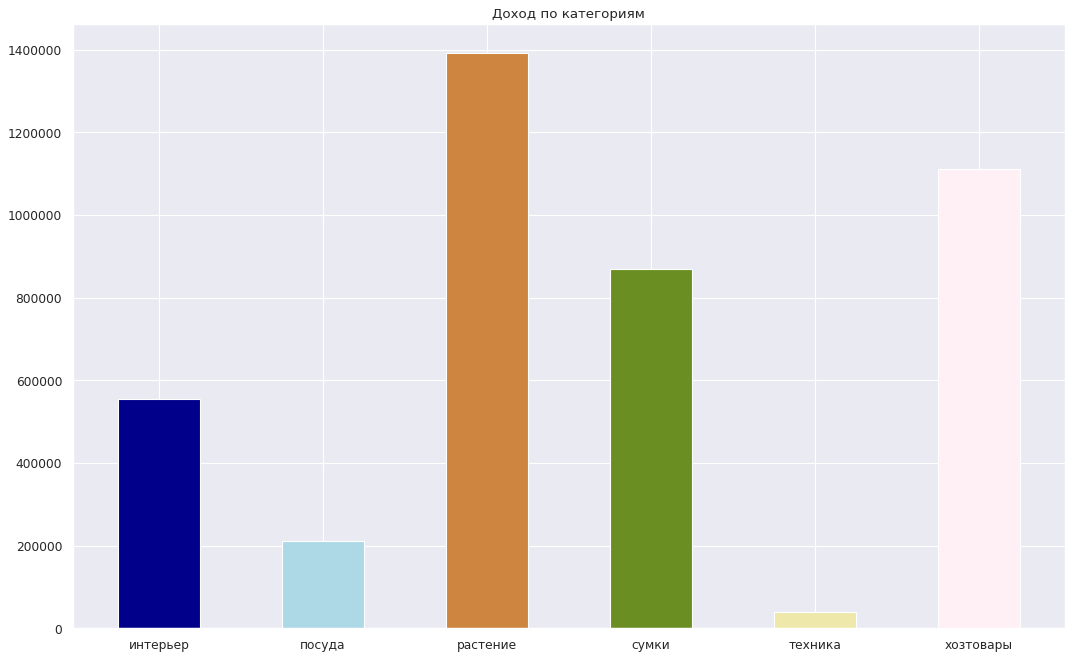

In [112]:
import random

all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k = 6)

plt.figure(figsize=(16,10), dpi = 80)

plt.bar(temp['category'], temp['product_total'], color = c, width=.5)
plt.title('Доход по категориям')
plt.show()

In [113]:
temp = df_without_plungers.groupby(['month_name', 'year'])['product_total'].sum().reset_index()
temp

,month_name,year,product_total
0,April,2019,"381,915.00"
1,August,2019,"197,833.00"
2,December,2018,"402,768.00"
3,February,2019,"345,454.00"
4,January,2019,"284,721.00"
5,July,2019,"276,547.00"
6,June,2019,"411,681.00"
7,March,2019,"320,018.00"
8,May,2019,"306,744.00"
9,November,2018,"371,180.00"


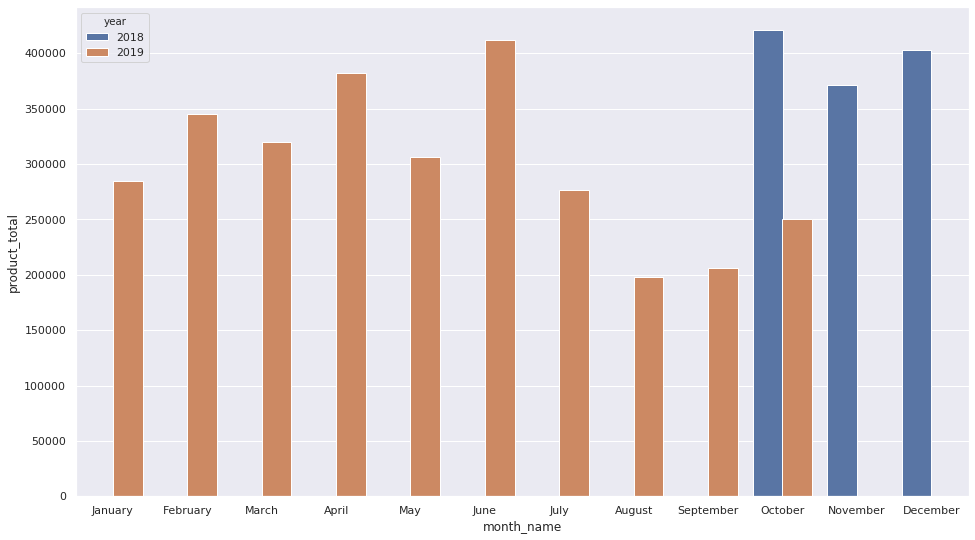

In [114]:
sns.barplot(x = 'month_name', y = 'product_total', hue = 'year', order =  month_order, data = temp)
plt.show()

### Без вантузов перекосов меньше.

## Посмотрим на барплоты / Меняем estimator=sum / len / median 

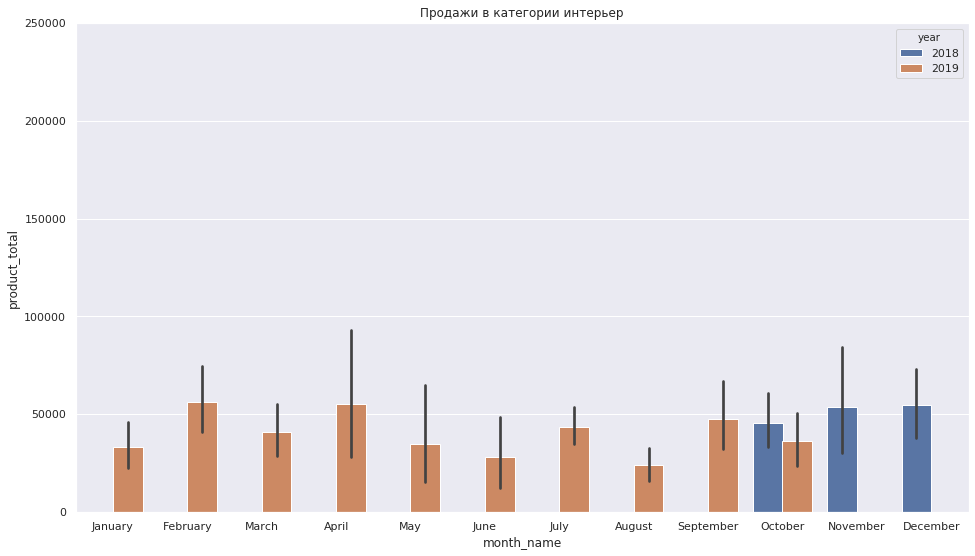

In [115]:
temp = df_without_plungers.query('category == "интерьер"')
temp.groupby(['year', 'month']).agg({'product_total': 'sum'})
ax = sns.barplot(x = 'month_name', y = 'product_total', hue = 'year', order =  month_order, data = temp, estimator=sum)
plt.title('Продажи в категории интерьер')
ax.set_ylim(-100, 250000)
plt.show()

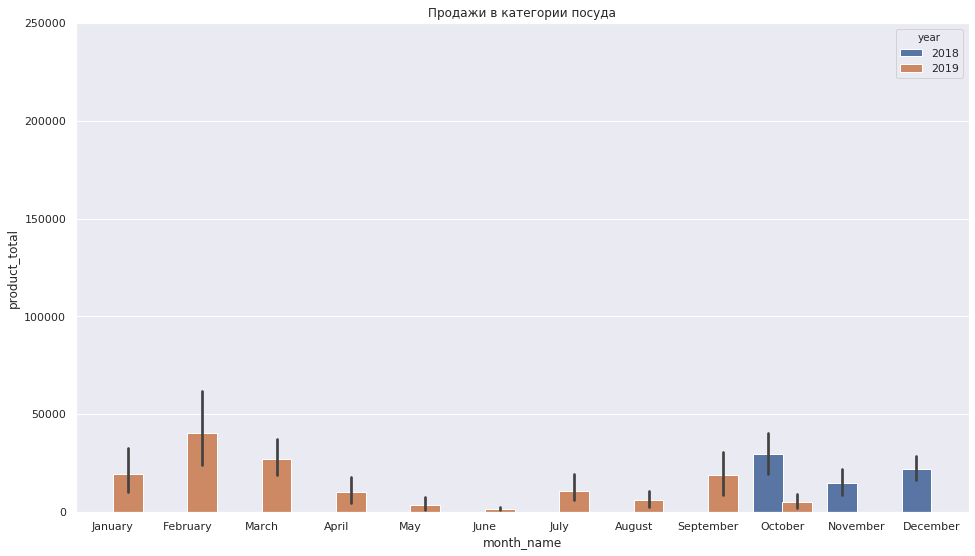

In [116]:
temp = df_without_plungers.query('category == "посуда"')
temp.groupby(['year', 'month']).agg({'product_total': 'sum'})
ax = sns.barplot(x = 'month_name', y = 'product_total', hue = 'year', order =  month_order, data = temp, estimator=sum)
plt.title('Продажи в категории посуда')
ax.set_ylim(-100, 250000)
plt.show()

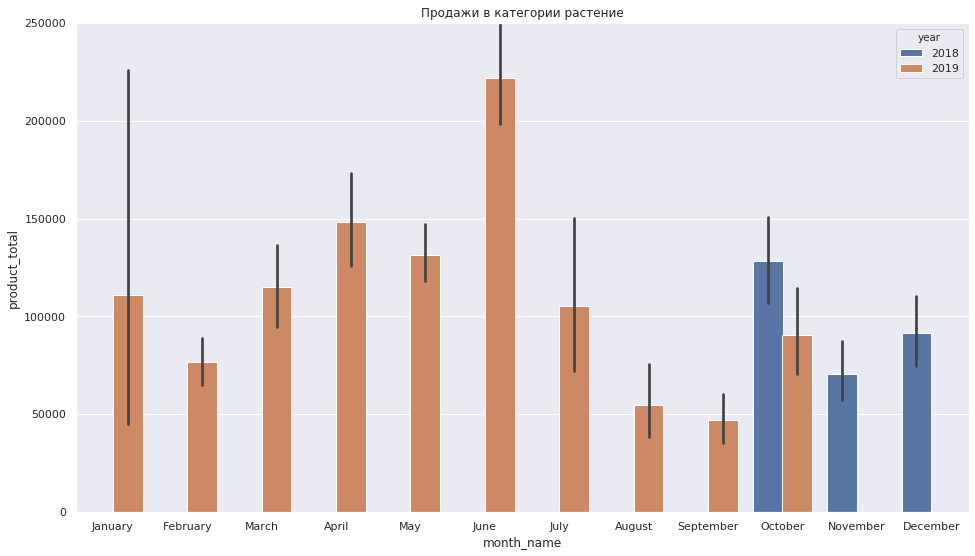

In [117]:
temp = df_without_plungers.query('category == "растение"')
temp.groupby(['year', 'month']).agg({'product_total': 'sum'})
ax = sns.barplot(x = 'month_name', y = 'product_total', hue = 'year', order =  month_order, data = temp, estimator=sum)
plt.title('Продажи в категории растение')
ax.set_ylim(-100, 250000)
plt.show()

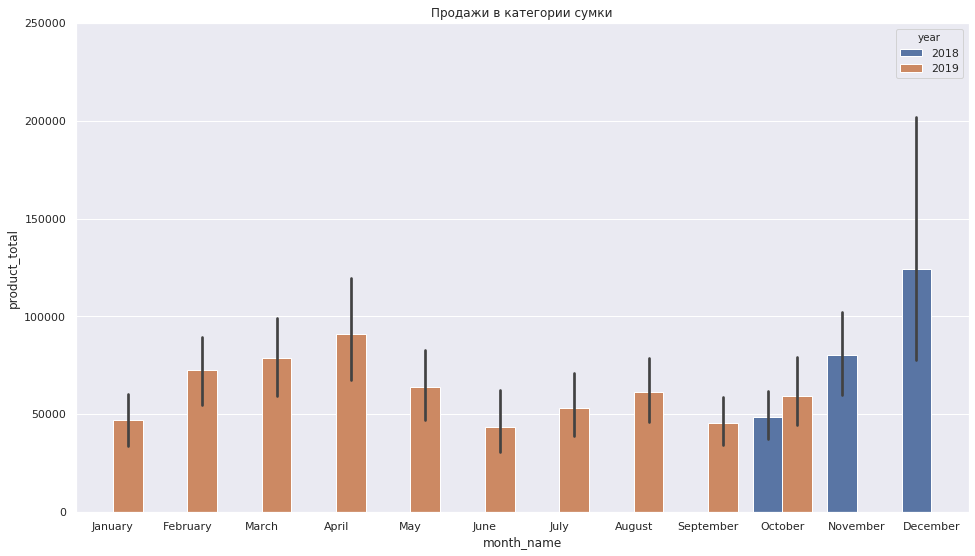

In [118]:
temp = df_without_plungers.query('category == "сумки"')
temp.groupby(['year', 'month']).agg({'product_total': 'sum'})
ax = sns.barplot(x = 'month_name', y = 'product_total', hue = 'year', order =  month_order, data = temp, estimator=sum)
plt.title('Продажи в категории сумки')
ax.set_ylim(-100, 250000)
plt.show()

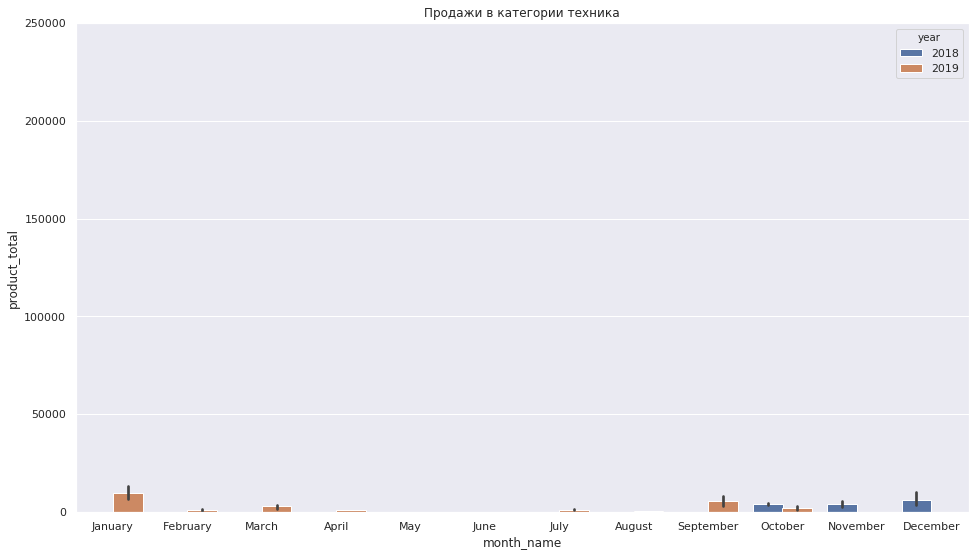

In [119]:
from numpy import median
temp = df_without_plungers.query('category == "техника"')
temp.groupby(['year', 'month']).agg({'product_total': 'sum'})
ax = sns.barplot(x = 'month_name', y = 'product_total', hue = 'year', order =  month_order, data = temp, estimator=sum)
plt.title('Продажи в категории техника')
ax.set_ylim(-100, 250000)
plt.show()

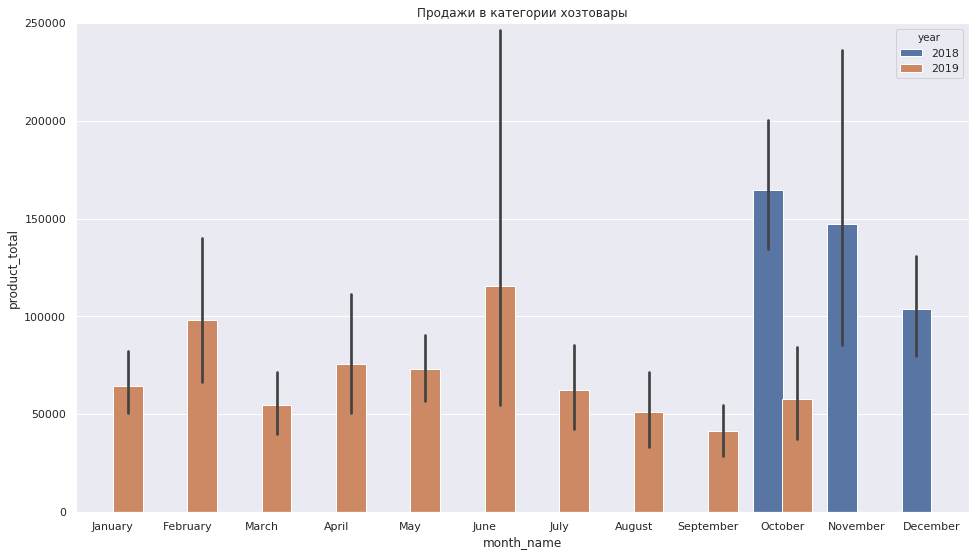

In [120]:
temp = df_without_plungers.query('category == "хозтовары"')
temp.groupby(['year', 'month']).agg({'product_total': 'sum'})
ax = sns.barplot(x = 'month_name', y = 'product_total', hue = 'year', order =  month_order, data = temp, estimator=sum)
ax.set_ylim(-100, 250000)
plt.title('Продажи в категории хозтовары')
plt.show()

In [121]:
category_total = df_without_plungers.pivot_table(index = ['category'], values = 'product_total', aggfunc = sum)
category_total

,product_total
category,
интерьер,"555,020.00"
посуда,"210,464.00"
растение,"1,391,542.00"
сумки,"869,720.00"
техника,"38,808.00"
хозтовары,"1,110,726.00"


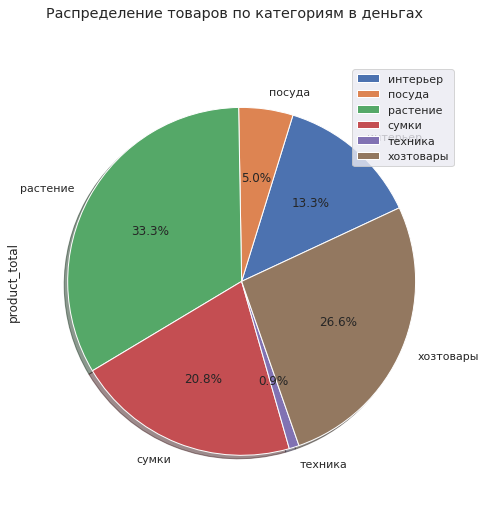

In [122]:
category_total.plot.pie(subplots=True, figsize=(8, 8), shadow = True, title = "Распределение товаров по категориям в деньгах", autopct='%1.1f%%', startangle=25)
plt.show()

### Еще раз убедились, что пользователи заходят за хозтоварами, травой и сумками — тратят на них больше всего денег.

In [123]:
quantity_total = df_without_plungers.pivot_table(index = ['category'], values = 'quantity', aggfunc = sum)
quantity_total

,quantity
category,
интерьер,2190
посуда,1143
растение,7779
сумки,528
техника,42
хозтовары,4171


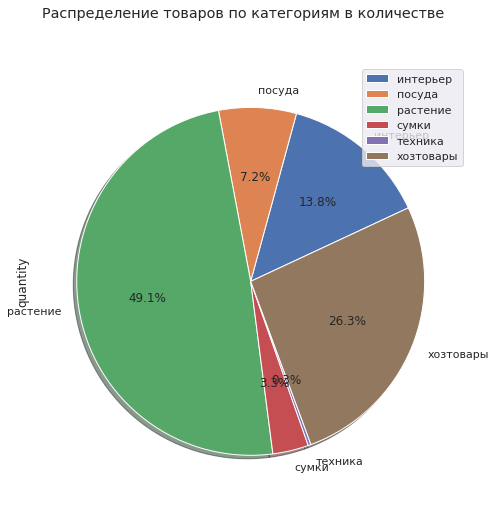

In [124]:
quantity_total.plot.pie(subplots=True, figsize=(8, 8), shadow = True, title = "Распределение товаров по категориям в количестве", autopct='%1.1f%%', startangle=25)
plt.show()

### Количественно тоже в лидерах трава.

In [125]:
dau = df_without_plungers.groupby('date_day').agg({'customer_id': 'nunique'}).mean()
print('Количество уникальных пользователей в день:', int(dau), 'человек')

Количество уникальных пользователей в день: 7 человек


In [126]:
wau = df_without_plungers.groupby(['year','week']).agg({'customer_id': 'nunique'}).mean()
print('Количество уникальных пользователей в неделю:', int(wau), 'человек')

Количество уникальных пользователей в неделю: 47 человек


In [127]:
mau = df_without_plungers.groupby(['year','month']).agg({'customer_id': 'nunique'}).mean()
print('Количество уникальных пользователей в месяц:', int(mau), 'человек')

Количество уникальных пользователей в месяц: 194 человек


In [128]:
df_without_plungers

,date,date_day,year,week,month_name,month,day_of_week,hour,customer_id,order_id,product,quantity,price,product_total,word_count,product_2_first_words,product_first_word,category,season
0,2018-10-01 00:00:00,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.00,142.00,8,комнатное растение,комнатное,растение,осень
1,2018-10-01 00:00:00,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.00,194.00,8,комнатное растение,комнатное,растение,осень
2,2018-10-01 00:00:00,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.00,112.00,5,радермахера d-12,радермахера,растение,осень
3,2018-10-01 00:00:00,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.00,179.00,4,хризолидокарпус лутесценс,хризолидокарпус,растение,осень
4,2018-10-01 00:00:00,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.00,112.00,6,циперус зумула,циперус,растение,осень
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6732,2019-10-31 11:00:00,2019-10-31,2019,44,October,10,Thursday,11,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"таз пластмассовый 40,0 л пищевой овальный (иж)...",1,404.00,404.00,8,таз пластмассовый,таз,хозтовары,осень
6733,2019-10-31 12:00:00,2019-10-31,2019,44,October,10,Thursday,12,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,сумка-тележка 2-х колесная gimi argo синяя,1,"1,087.00","1,087.00",6,сумка-тележка 2-х,сумка-тележка,сумки,осень
6734,2019-10-31 13:00:00,2019-10-31,2019,44,October,10,Thursday,13,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,герань домашняя (пеларгония зональная) цветуща...,1,157.00,157.00,11,герань домашняя,герань,растение,осень
6735,2019-10-31 14:00:00,2019-10-31,2019,44,October,10,Thursday,14,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"таз пластмассовый со стиральной доской (иж), 1...",1,397.00,397.00,7,таз пластмассовый,таз,хозтовары,осень


---

---

<div class="alert alert-block alert-warning">
    

### Комментарий от тимлида v2

На некоторых графиках можно было бы изменить масштаб, чтобы они были нагляднее.
</div>

---

<a name="stage_4"></a>
# 4. Сегментация покупателей, машинное обучение, гипотезы

[К оглавлению](#table_of_contents)

In [129]:
df_without_plungers.head()

,date,date_day,year,week,month_name,month,day_of_week,hour,customer_id,order_id,product,quantity,price,product_total,word_count,product_2_first_words,product_first_word,category,season
0,2018-10-01,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.00,142.00,8,комнатное растение,комнатное,растение,осень
1,2018-10-01,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.00,194.00,8,комнатное растение,комнатное,растение,осень
2,2018-10-01,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.00,112.00,5,радермахера d-12,радермахера,растение,осень
3,2018-10-01,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.00,179.00,4,хризолидокарпус лутесценс,хризолидокарпус,растение,осень
4,2018-10-01,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.00,112.00,6,циперус зумула,циперус,растение,осень


In [130]:
def day_off(day_of_week):
    if day_of_week in ['Saturday', 'Sunday']:
        return 1
    else:
        return 0

In [131]:
def day_on(day_of_week):
    if day_of_week not in ['Saturday', 'Sunday']:
        return 1
    else:
        return 0 

In [132]:
df_without_plungers['day_off'] = df_without_plungers['day_of_week'].apply(day_off)
df_without_plungers['day_on'] = df_without_plungers['day_of_week'].apply(day_on)

In [133]:
df_without_plungers.head()

,date,date_day,year,week,month_name,month,day_of_week,hour,customer_id,order_id,product,quantity,price,product_total,word_count,product_2_first_words,product_first_word,category,season,day_off,day_on
0,2018-10-01,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.00,142.00,8,комнатное растение,комнатное,растение,осень,0,1
1,2018-10-01,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.00,194.00,8,комнатное растение,комнатное,растение,осень,0,1
2,2018-10-01,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.00,112.00,5,радермахера d-12,радермахера,растение,осень,0,1
3,2018-10-01,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.00,179.00,4,хризолидокарпус лутесценс,хризолидокарпус,растение,осень,0,1
4,2018-10-01,2018-10-01,2018,40,October,10,Monday,0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.00,112.00,6,циперус зумула,циперус,растение,осень,0,1


In [134]:
clusters = df_without_plungers.pivot_table(index = 'week', aggfunc = {'customer_id': 'nunique', 'quantity': 'sum', 'product_total': 'sum', 'day_off': 'sum', 'day_on': 'sum'})
clusters.head()

,customer_id,day_off,day_on,product_total,quantity
week,,,,,
1,20,12,15,"43,963.00",65
2,37,22,37,"59,105.00",179
3,38,9,38,"79,766.00",118
4,49,18,40,"58,108.00",282
5,41,15,47,"59,548.00",101


In [135]:
# создаём объект класса scaler
scaler = StandardScaler() 
# обучаем нормализатор и преобразуем набор данных
x_sc = scaler.fit_transform(clusters)

In [136]:
linked = linkage(x_sc, method = 'ward')

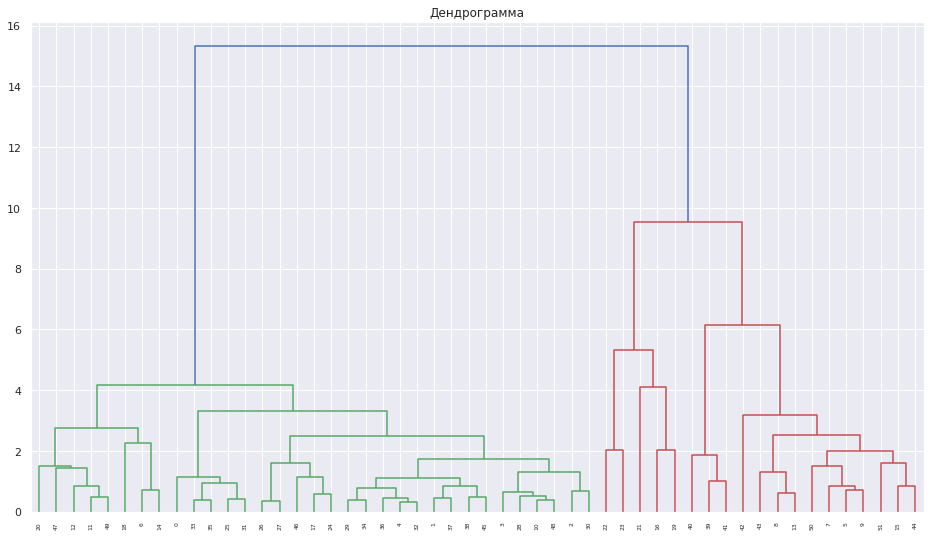

In [137]:
plt.figure(figsize=(16, 9))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма')
plt.show()

### 2 кластера детектед

In [138]:
# задаём модель k_means с числом кластеров 2
km = KMeans(n_clusters = 2)

# прогнозируем кластеры для наблюдений 
labels = km.fit_predict(x_sc)

# сохраняем метки кластера в поле нашего датасета
clusters['cluster_km'] = labels

In [139]:
cluster_km_mean = clusters.groupby(['cluster_km']).mean()
cluster_km_mean.T

cluster_km,0,1
customer_id,44.11,69.80
day_off,19.54,55.47
day_on,66.65,181.00
product_total,"62,247.11","124,875.80"
quantity,196.16,573.00


In [140]:
clusters['average_check'] = clusters['product_total'] / clusters['customer_id']
clusters.head()

,customer_id,day_off,day_on,product_total,quantity,cluster_km,average_check
week,,,,,,,
1,20,12,15,"43,963.00",65,0,"2,198.15"
2,37,22,37,"59,105.00",179,0,"1,597.43"
3,38,9,38,"79,766.00",118,0,"2,099.11"
4,49,18,40,"58,108.00",282,0,"1,185.88"
5,41,15,47,"59,548.00",101,0,"1,452.39"


In [141]:
#проверим статистическое различие групп
alpha = .05 # уровень статистической значимости
results = stats.mannwhitneyu(clusters[clusters['cluster_km'] == '0']['product_total'], clusters[clusters['cluster_km'] == '1']['product_total'])[1]

print('p-value:', "{0:.2f}".format(results))
if (results < alpha):
    print('Отвергаем нулевую гипотезу. Выручка 0-го кластера отличается от выручки 1-го кластера')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Выручка 0-го кластера не отличается от выручки 1-го кластера')

p-value: 0.00
Отвергаем нулевую гипотезу. Выручка 0-го кластера отличается от выручки 1-го кластера


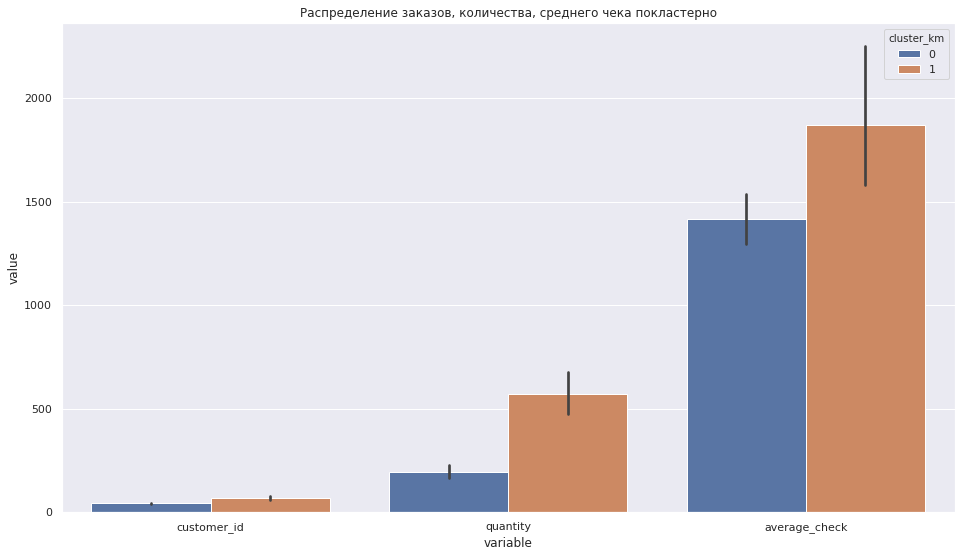

In [142]:
plt.figure(figsize = (16,9))
melted = pd.melt(clusters, id_vars = ['cluster_km'], value_vars = ['customer_id', 'quantity', 'average_check'])
ax = sns.barplot(x = 'variable' , y = 'value',  hue = 'cluster_km', data = melted)
plt.title('Распределение заказов, количества, среднего чека покластерно')
plt.show()

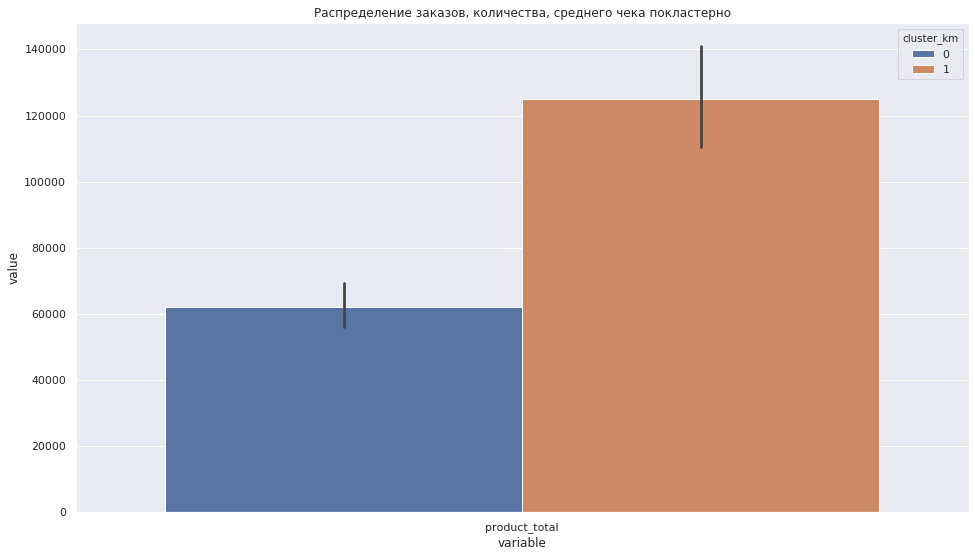

In [143]:
plt.figure(figsize = (16,9))
melted = pd.melt(clusters, id_vars = ['cluster_km'], value_vars = ['product_total'])
ax = sns.barplot(x = 'variable' , y = 'value',  hue = 'cluster_km', data = melted)
plt.title('Распределение заказов, количества, среднего чека покластерно')
plt.show()

### Первый кластер выглядит доходнее

In [144]:
cluster_0 = clusters.query('cluster_km == "0"')
cluster_0

,customer_id,day_off,day_on,product_total,quantity,cluster_km,average_check
week,,,,,,,
1,20,12,15,"43,963.00",65,0,"2,198.15"
2,37,22,37,"59,105.00",179,0,"1,597.43"
3,38,9,38,"79,766.00",118,0,"2,099.11"
4,49,18,40,"58,108.00",282,0,"1,185.88"
5,41,15,47,"59,548.00",101,0,"1,452.39"
6,66,24,78,"110,161.00",297,0,"1,669.11"
7,64,39,63,"64,815.00",168,0,"1,012.73"
10,68,24,103,"92,500.00",205,0,"1,360.29"
11,48,17,72,"64,842.00",180,0,"1,350.88"


In [153]:
cluster_0['product_total'].sum()

2303143.0

In [154]:
cluster_0['quantity'].sum()

7258

In [155]:
cluster_0['average_check'].mean()

1414.0004336958827

In [161]:
cluster_0['customer_id'].mean()

44.108108108108105

### В нулевом кластере итого потратили 2303143, сделали покупок 7258 со средним чеком в 1414. Уникальных покупателей в среднем 44.

In [145]:
cluster_1 = clusters.query('cluster_km == "1"')
cluster_1

,customer_id,day_off,day_on,product_total,quantity,cluster_km,average_check
week,,,,,,,
8,77,34,84,"100,899.00",286,1,"1,310.38"
9,77,30,124,"92,934.00",471,1,"1,206.94"
14,72,23,122,"106,249.00",405,1,"1,475.68"
17,62,75,194,"71,965.00",547,1,"1,160.73"
20,54,38,310,"84,640.00",494,1,"1,567.41"
22,52,150,176,"94,665.00",555,1,"1,820.48"
23,55,107,499,"160,615.00",781,1,"2,920.27"
24,43,91,350,"164,571.00",829,1,"3,827.23"
40,92,32,156,"158,331.00",644,1,"1,720.99"


In [158]:
cluster_1['product_total'].sum()

1873137.0

In [157]:
cluster_1['quantity'].sum()

8595

In [156]:
cluster_1['average_check'].mean()

1868.3624056858994

In [162]:
cluster_1['customer_id'].mean()

69.8

### В первом кластере итого потратили 1873137, сделали покупок 8595 со средним чеком в 1868. Уникальных покупателей в среднем 69,8.

---

<div class="alert alert-block alert-warning">
    

### Комментарий от тимлида v2

Хороший анализ. Но после этого блока можно было бы написать суммарно какие различия между кластерами и что для них характерно. 
</div>

---

### Проверим гипотезу про средний чек 

In [146]:
#посчитаем дисперсию для среза данных лояльных покупателей:
print('Дисперсия среза данных клиентов 0-го кластера:', np.var(cluster_0['average_check']))
#посчитаем дисперсию для среза данных обычных покупателей:
print('Дисперсия среза данных клиентов 1-го кластера:', np.var(cluster_1['average_check']))
print()
print('Соотношение дисперсий:', np.var(cluster_1['average_check']) / np.var(cluster_0['average_check']))

Дисперсия среза данных клиентов 0-го кластера: 153914.2067642094
Дисперсия среза данных клиентов 1-го кластера: 454068.4402407497

Соотношение дисперсий: 2.9501398849838787


Будем использовать критерий Манна-Уитни.

In [147]:
alpha = .05 # уровень статистической значимости
results = stats.mannwhitneyu(clusters[clusters['cluster_km'] == '0']['average_check'], clusters[clusters['cluster_km'] == '1']['average_check'])[1]

print('p-value:', "{0:.2f}".format(results))
if (results < alpha):
    print('Отвергаем нулевую гипотезу. Средний чек 0-го кластера отличается от среднего чека 1-го кластера')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Средний чек 0-го кластера не отличается от среднего чека 1-го кластера')

p-value: 0.00
Отвергаем нулевую гипотезу. Средний чек 0-го кластера отличается от среднего чека 1-го кластера


### Проверим гипотезу о том, что итоговая покупка в выходной не отличается от итоговой покупки в будни.

In [148]:
alpha = .05

In [149]:
total_check_day_off = df_without_plungers[df_without_plungers['day_off'] != 0]['product_total']
total_check_day_on = df_without_plungers[df_without_plungers['day_off'] == 0]['product_total']

In [150]:
results = st.ttest_ind(total_check_day_off, total_check_day_on)

In [151]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.000204394010156778
Отвергаем нулевую гипотезу


In [164]:
results = stats.mannwhitneyu(total_check_day_off, total_check_day_on)[1]

print('p-value:', "{0:.2f}".format(results))
if (results < alpha):
    print('Отвергаем нулевую гипотезу. Покупки в выходные отличаются от покупок в будни')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Отличий нет')

p-value: 0.00
Отвергаем нулевую гипотезу. Покупки в выходные отличаются от покупок в будни


---

<div class="alert alert-block alert-danger">
    

### Комментарий от тимлида

В кластеризацию стоит добавить еще признаков -- например бинарных: был куплен заказ ночью или днем, в будни или выходные итд.
    
Также я бы  добавила еще гипотез -- например что средний чек днем и ночью различается итд)
    
    
</div>

---

---

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида v2

Вижу что все сделано -- спасибо!
</div>

---

---

<a name="stage_5"></a>
# №5. Выводы

[К оглавлению](#table_of_contents)

Наблюдается сильная сезонность в интернет-магазине, а также для отдельных групп товаров:

Относительно месяцев:
- растут к весне растения
- растут к осени хозтовары
- зимой и осенью растет посуда
- технику тоже берут зимой и осенью

Относительно дней:
- на сумки в субботу спрос минимален и растет до пятницы.

Относительно часов:
- покупатели не покупают товары с 0 до 6-7 утра, видимо, потому что спят.

Продажи итого сильно упали по сравнению с предыдущим годом.*

Кластеры:
- В нулевом кластере итого потратили 2303143, сделали покупок 7258 со средним чеком в 1414. Уникальных покупателей в среднем 44.
- В первом кластере итого потратили 1873137, сделали покупок 8595 со средним чеком в 1868. Уникальных покупателей в среднем 69,8.

**Стабильно растущих категорий нет.**

**Больше всего денег принесли:**
    - растения и хозтовары, 1,391,542.00 и 1,110,726.00 соответственно
**Меньше всего денег принесли:**
    - техника и посуда, 38,808.00 и 210,464.00 соответственно
**Средние показатели:**
    - интерьер и сумки, 555,020.00 и 869,720.00 соответственно


*но за 2019 год информация не полная, объективно сравнить не получится.*


Ссылка на презентацию: https://cloud.mail.ru/public/P2MD/7Viq6RL7z / Скорректировал насколько понял, спасибо за комменты.

---

<div class="alert alert-block alert-warning">
    

### Общий Комментарий от тимлида

Вывод и презентация оставляют желать лучшего)
    
Из презентации стоит убрать скриншоты кода -- графики еще куда ни шло, но твой код особо там не нужен) Далее -- стоит написать общий вывод, которого там нет. 
    
Впрочем в самой работе общего вывода тоже особо нет -- что такое первый кластер не ясно, как использовать сегментацию и как различаются сегменты (по среднему чеку, сезонности) тоже не понятно.
    
    
Также общий вывод стоит дополнить информацией о продукте -- какие категории товаров самые доходные, какие самые ходовые итд)  
    
</div>

---

---

<div class="alert alert-block alert-success">
    

### Общий Комментарий от тимлида v2

Спасибо за работу над ошибками! Все основные моменты исправлены -- сейчас остались только замечания, которые стоит учесть в будущем)
    
С презентацией и выводами все стало гораздо лучше -- спасибо!)
    
 Обратную свзяь в личку напишу чуть позже)   
</div>

---

---

<a name="stage_6"></a>
# №6. Документация

[К оглавлению](#table_of_contents)

### 1

Решение в официальной документации, можно задавать свой порядок в виде строки, не идеально, но пойдет:
- https://seaborn.pydata.org/generated/seaborn.barplot.html
- order, hue_orderlists of strings, optional
- Order to plot the categorical levels in, otherwise the levels are inferred from the data objects.

### 2

Вспоминаем синтаксис джойнов:
- https://ru.stackoverflow.com/questions/300050/%D0%9A%D0%B0%D0%BA-%D0%BF%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D1%82%D1%8C-%D1%81%D0%BF%D0%B8%D1%81%D0%BE%D0%BA-%D0%B2-%D1%81%D1%82%D1%80%D0%BE%D0%BA%D1%83

### 3

Как сделать словарь со списками:
- https://stackoverflow.com/questions/26367812/appending-to-list-in-python-dictionary

И как из дефолтдикта вернуться обратно в словарь
- https://stackoverflow.com/questions/20428636/python-convert-defaultdict-to-dict

### 4

Репозиторий вордклауда:
- https://github.com/amueller/word_cloud

Статья по запросу
- https://www.datacamp.com/community/tutorials/wordcloud-python

### 5

50 различных визуализаций:
- https://habr.com/ru/post/468295/